## 1. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Loading universities_data.csv datasets
df_ust = pd.read_csv('universities_data.csv')
df_ust.head()

ID number                                 Name  year    ZIP code  \
0     100654             Alabama A & M University  2013       35762   
1     100663  University of Alabama at Birmingham  2013  35294-0110   
2     100690                   Amridge University  2013  36117-3553   
3     100706  University of Alabama in Huntsville  2013       35899   
4     100724             Alabama State University  2013  36104-0271   

                              Highest degree offered        County name  \
0             Doctor's degree - research/scholarship     Madison County   
1  Doctor's degree - research/scholarship and pro...   Jefferson County   
2  Doctor's degree - research/scholarship and pro...  Montgomery County   
3  Doctor's degree - research/scholarship and pro...     Madison County   
4  Doctor's degree - research/scholarship and pro...  Montgomery County   

  Longitude location of institution Latitude location of institution  \
0                          -865,685                        3,478,337   
1                          -868,092                        3,350,223   
2                           -86,174                        3,236,261   
3                          -866,384                        3,472,282   
4                          -862,957                        3,236,432   

  Religious affiliation Offers Less than one year certificate  ...  \
0        Not applicable                            Implied no  ...   
1        Not applicable                            Implied no  ...   
2    Churches of Christ                            Implied no  ...   
3        Not applicable                                   Yes  ...   
4        Not applicable                            Implied no  ...   

  Percent of freshmen receiving federal grant aid  \
0                                            81.0   
1                                            36.0   
2                                            90.0   
3                                            31.0   
4                                            76.0   

  Percent of freshmen receiving Pell grants  \
0                                      81.0   
1                                      36.0   
2                                      90.0   
3                                      31.0   
4                                      76.0   

  Percent of freshmen receiving other federal grant aid  \
0                                                7.0      
1                                               10.0      
2                                                0.0      
3                                                4.0      
4                                               13.0      

  Percent of freshmen receiving state/local grant aid  \
0                                                1.0    
1                                                0.0    
2                                               40.0    
3                                                1.0    
4                                               11.0    

  Percent of freshmen receiving institutional grant aid  \
0                                               32.0      
1                                               60.0      
2                                               90.0      
3                                               63.0      
4                                               34.0      

  Percent of freshmen receiving student loan aid  \
0                                           89.0   
1                                           56.0   
2                                          100.0   
3                                           46.0   
4                                           81.0   

  Percent of freshmen receiving federal student loans  \
0                                               89.0    
1                                               55.0    
2                                              100.0    
3                                               46.0    
4                 

In [3]:
df_ust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Columns: 145 entries, ID number to Endowment assets (year end) per FTE enrollment (FASB)
dtypes: float64(114), int64(2), object(29)
memory usage: 1.7+ MB


In [4]:
df_ust.shape

(1534, 145)

In [5]:
df_ust.duplicated().sum()

0

In [6]:
col = list(df_ust.columns)
print(df_ust.columns[:20])
print(df_ust.columns[20:40])
print(df_ust.columns[40:60])
print(df_ust.columns[60:80])
print(df_ust.columns[80:100])
print(df_ust.columns[100:])

Index(['ID number', 'Name', 'year', 'ZIP code', 'Highest degree offered',
       'County name', 'Longitude location of institution',
       'Latitude location of institution', 'Religious affiliation',
       'Offers Less than one year certificate',
       'Offers One but less than two years certificate',
       'Offers Associate's degree',
       'Offers Two but less than 4 years certificate',
       'Offers Bachelor's degree', 'Offers Postbaccalaureate certificate',
       'Offers Master's degree', 'Offers Post-master's certificate',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice',
       'Offers Doctor's degree - other'],
      dtype='object')
Index(['Offers Other degree', 'Applicants total', 'Admissions total',
       'Enrolled total', 'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'SAT Critical Reading 25th percentile score',
       'SAT Critical Reading 75th per

In [7]:
selected_col=['Name', 'year','Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       'Admissions yield - total'
       ]

In [8]:
df = df_ust[selected_col]
df.head()

Name  year  Applicants total  \
0             Alabama A & M University  2013            6142.0   
1  University of Alabama at Birmingham  2013            5689.0   
2                   Amridge University  2013               NaN   
3  University of Alabama in Huntsville  2013            2054.0   
4             Alabama State University  2013           10245.0   

   Admissions total  Enrolled total  Estimated enrollment, total  \
0            5521.0          1104.0                       5024.0   
1            4934.0          1773.0                      18568.0   
2               NaN             NaN                        626.0   
3            1656.0           651.0                       7376.0   
4            5251.0          1479.0                       6076.0   

   Tuition and fees, 2013-14  \
0                     7182.0   
1                     7206.0   
2                     6870.0   
3                     9192.0   
4                     8720.0   

   Total price for in-state students living on campus 2013-14  \
0                                            21849.0            
1                                            22495.0            
2                                                NaN            
3                                            23466.0            
4                                            18286.0            

   Total price for out-of-state students living on campus 2013-14  \
0                                            27441.0                
1                                            31687.0                
2                                                NaN                
3                                            35780.0                
4                                            25222.0                

  State abbreviation  ... Undergraduate enrollment  Graduate enrollment  \
0            Alabama  ...                   4051.0                969.0   
1            Alabama  ...                  11502.0               7066.0   
2            Alabama  ...                    322.0                309.0   
3            Alabama  ...                   5696.0               1680.0   
4            Alabama  ...                   5356.0                719.0   

   Full-time undergraduate enrollment  Part-time undergraduate enrollment  \
0                              3799.0                               252.0   
1                              8357.0                              3145.0   
2                               202.0                               120.0   
3                              4237.0                              1459.0   
4                              4872.0                               484.0   

   Percent of total enrollment that are women  \
0                                        55.0   
1                                        61.0   
2                                        58.0   
3                                        44.0   
4                                        61.0   

   Percent of undergraduate enrollment that are women  \
0                                               51.0    
1                                               58.0    
2                                               61.0    
3                                               44.0    
4                                               59.0    

   Graduation rate - Bachelor degree within 4 years, total  \
0                                               10.0         
1                                               29.0         
2                                                0.0         
3                                               16.0         
4                                                9.0         

   Graduation rate - Bachelor degree within 5 years, total  \
0                                               23.0         
1                                               46.0         
2                                                0.0         
3                                               37.0    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 23 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Name                                                            1534 non-null   object 
 1   year                                                            1534 non-null   int64  
 2   Applicants total                                                1377 non-null   float64
 3   Admissions total                                                1377 non-null   float64
 4   Enrolled total                                                  1377 non-null   float64
 5   Estimated enrollment, total                                     1532 non-null   float64
 6   Tuition and fees, 2013-14                                       1497 non-null   float64
 7   Total price for in-state students living on campus 

In [10]:
#Checking null value in object type columns
print(df['Control of institution'].isnull().sum())
print(df['State abbreviation'].isnull().sum())
  

0
0


In [11]:
#Checking null value in columns
df.isnull().sum().sort_values(ascending=False).head(20)

Admissions yield - total                                          158
Applicants total                                                  157
Admissions total                                                  157
Enrolled total                                                    157
Total price for in-state students living on campus 2013-14        134
Total price for out-of-state students living on campus 2013-14    134
Graduation rate - Bachelor degree within 6 years, total            58
Graduation rate - Bachelor degree within 5 years, total            58
Graduation rate - Bachelor degree within 4 years, total            58
Tuition and fees, 2013-14                                          37
Percent of undergraduate enrollment that are women                 12
Full-time undergraduate enrollment                                  2
Percent of total enrollment that are women                          2
Part-time undergraduate enrollment                                  2
Full-time enrollment

In [12]:
# Identify columns with null values
col_null = df.columns[df.isnull().any()]

# Fill null values with mean in each column
for col in col_null:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)
    
df[col_null] = df[col_null].astype(float)

    
df.isnull().sum().sort_values(ascending=False).head(20)

Name                                                              0
Part-time enrollment                                              0
Graduation rate - Bachelor degree within 6 years, total           0
Graduation rate - Bachelor degree within 5 years, total           0
Graduation rate - Bachelor degree within 4 years, total           0
Percent of undergraduate enrollment that are women                0
Percent of total enrollment that are women                        0
Part-time undergraduate enrollment                                0
Full-time undergraduate enrollment                                0
Graduate enrollment                                               0
Undergraduate enrollment                                          0
Full-time enrollment                                              0
year                                                              0
Control of institution                                            0
State abbreviation                              

In [13]:
df.nunique()

Name                                                              1517
year                                                                 1
Applicants total                                                  1299
Admissions total                                                  1237
Enrolled total                                                     964
Estimated enrollment, total                                       1414
Tuition and fees, 2013-14                                         1385
Total price for in-state students living on campus 2013-14        1351
Total price for out-of-state students living on campus 2013-14    1344
State abbreviation                                                  51
Control of institution                                               2
Full-time enrollment                                              1383
Part-time enrollment                                              1100
Undergraduate enrollment                                          1380
Gradua

In [14]:
df['State abbreviation'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [15]:
df['Control of institution'].unique()

array(['Public', 'Private not-for-profit'], dtype=object)

In [16]:
df['year'].unique()

array([2013], dtype=int64)

In [17]:
df.describe()

year  Applicants total  Admissions total  Enrolled total  \
count  1534.0       1534.000000       1534.000000     1534.000000   
mean   2013.0       6391.193174       3554.880174     1043.046478   
std       0.0       8325.339524       4082.824876     1217.579156   
min    2013.0          0.000000          0.000000        0.000000   
25%    2013.0       1639.250000       1027.500000      313.500000   
50%    2013.0       3914.000000       2337.500000      622.000000   
75%    2013.0       6391.193174       3811.000000     1103.750000   
max    2013.0      72676.000000      35815.000000    10241.000000   

       Estimated enrollment, total  Tuition and fees, 2013-14  \
count                  1534.000000                1534.000000   
mean                   7033.115535               20727.490314   
std                    9381.523189               12304.572583   
min                      68.000000                1032.000000   
25%                    1503.750000                8707.000000   
50%                    3128.000000               20710.000000   
75%                    8374.750000               29807.500000   
max                   79576.000000               49138.000000   

       Total price for in-state students living on campus 2013-14  \
count                                        1534.000000            
mean                                        34935.306429            
std                                         12689.238638            
min                                          9768.000000            
25%                                         23192.500000            
50%                                         34935.306429            
75%                                         43803.750000            
max                                         64988.000000            

       Total price for out-of-state students living on campus 2013-14  \
count                                        1534.000000                
mean                                        38767.612857                
std                                         10237.448287                
min                                          9768.000000                
25%                                         31686.250000                
50%                                         38611.500000                
75%                                         44609.000000                
max                                         64988.000000                

       Full-time enrollment  Part-time enrollment  Undergraduate enrollment  \
count           1534.000000           1534.000000               1534.000000   
mean            5371.494125           1698.620104               5532.885117   
std             7469.617641           2920.157429               7237.923510   
min                0.000000              0.000000                  0.000000   
25%             1199.250000            168.000000               1328.000000   
50%             2331.500000            672.000000               2492.000000   
75%             6068.500000           2049.750000               6388.250000   
max            50012.000000          40985.000000              51333.000000   

       Graduate enrollment  Full-time undergraduate enrollment  \
count          1534.000000                         1534.000000   
mean           1537.229112                         4507.738903   
std            2763.393608                         6038.249958   
min               0.000000                            0.000000   
25%              47.000000                         1092.500000   
50%             471.500000                         2068.000000   
75%            1730.500000                         5195.000000   
max           29874.000000                        40020.000000   

       Part-time undergraduate enrollment  \
count                         1534.000000   
mean                          1025.146214   
std                           2120.111086   
min                              0

In [18]:
df.columns

Index(['Name', 'year', 'Applicants total', 'Admissions total',
       'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Full-time enrollment',
       'Part-time enrollment', 'Undergraduate enrollment',
       'Graduate enrollment', 'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       'Admissions yield - total'],
      dtype='object')

In [19]:
#Loading state gdp datasets
df_st = pd.read_csv('states_gdp.csv')
df_st.head()

code       state  gdp_million
0  1000     Alabama     191481.0
1  2000      Alaska      56622.8
2  4000     Arizona     275199.1
3  5000    Arkansas     114251.5
4  6000  California    2262771.2

In [20]:
#Checking shape
df_st.shape

(51, 3)

In [21]:
#Checking information on datasets
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         51 non-null     int64  
 1   state        51 non-null     object 
 2   gdp_million  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [22]:
#Handling with null data
df_st.isnull().sum()

code           0
state          0
gdp_million    0
dtype: int64

In [23]:
#Handling with duplicate data
df_st.duplicated().sum()

0

In [24]:
#Checking unique values
df_st.nunique()

code           51
state          51
gdp_million    51
dtype: int64

In [25]:
#Describing on numerical varible
df_st[['gdp_million']].describe()

gdp_million
count  5.100000e+01
mean   3.268928e+05
std    4.088304e+05
min    2.909880e+04
25%    8.209975e+04
50%    1.830149e+05
75%    4.260313e+05
max    2.262771e+06

# 2.  Exploratory Data Analysis

In [26]:
# Find the index (row) where maximum and minimum GDP values occur
idx_mx_gdp = df_st['gdp_million'].idxmax()
idx_mn_gdp = df_st['gdp_million'].idxmin()

# Get the corresponding state names
st_mx_gdp = df_st.loc[idx_mx_gdp, 'state']
st_mn_gdp = df_st.loc[idx_mn_gdp, 'state']

# Find the maximum and minimum GDP values
mx_gdp = df_st.loc[idx_mx_gdp, 'gdp_million']
mn_gdp = df_st.loc[idx_mn_gdp, 'gdp_million']

# Print the results with comments
print(f'State with Maximum GDP: {st_mx_gdp}, GDP: {mx_gdp} million')
print(f'State with Minimum GDP: {st_mn_gdp}, GDP: {mn_gdp} million')

State with Maximum GDP: California, GDP: 2262771.2 million
State with Minimum GDP: Vermont, GDP: 29098.8 million


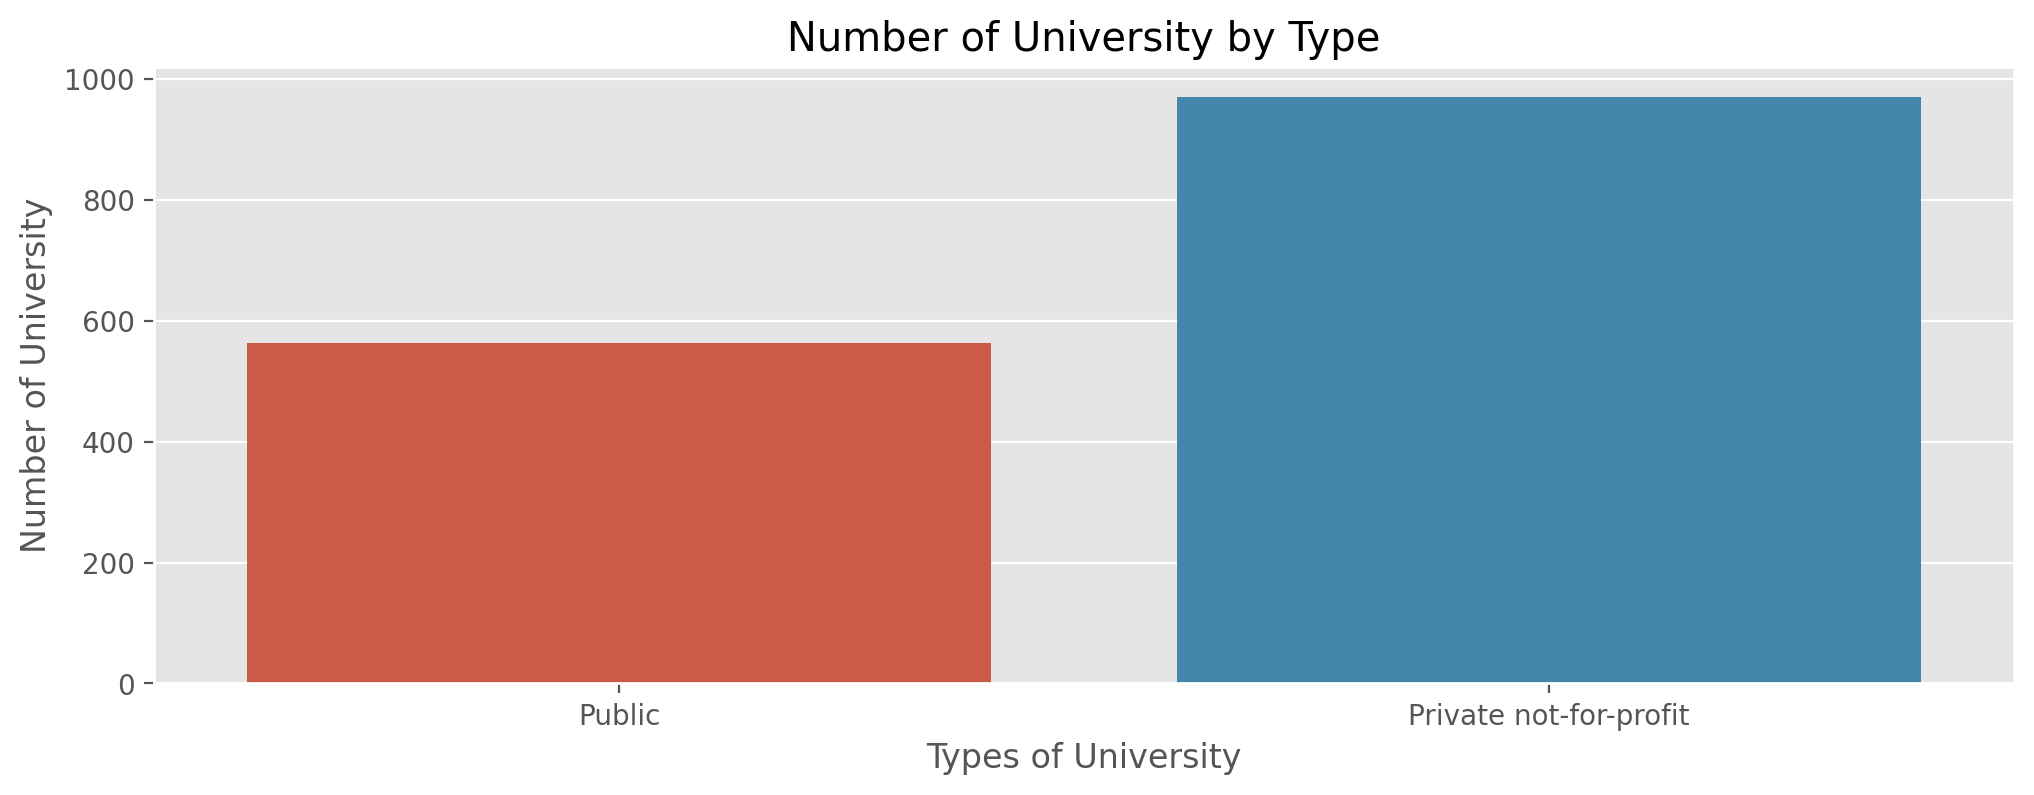



Private not-for-profit    971
Public                    563
Name: Control of institution, dtype: int64


In [27]:
plt.figure(figsize=(12,4), dpi=200)
sns.countplot(x='Control of institution', data=df)
plt.title('Number of University by Type')
plt.ylabel("Number of University")
plt.xlabel('Types of University')
plt.show()
print('\n')
print(df['Control of institution'].value_counts())

<function matplotlib.pyplot.show(close=None, block=None)>

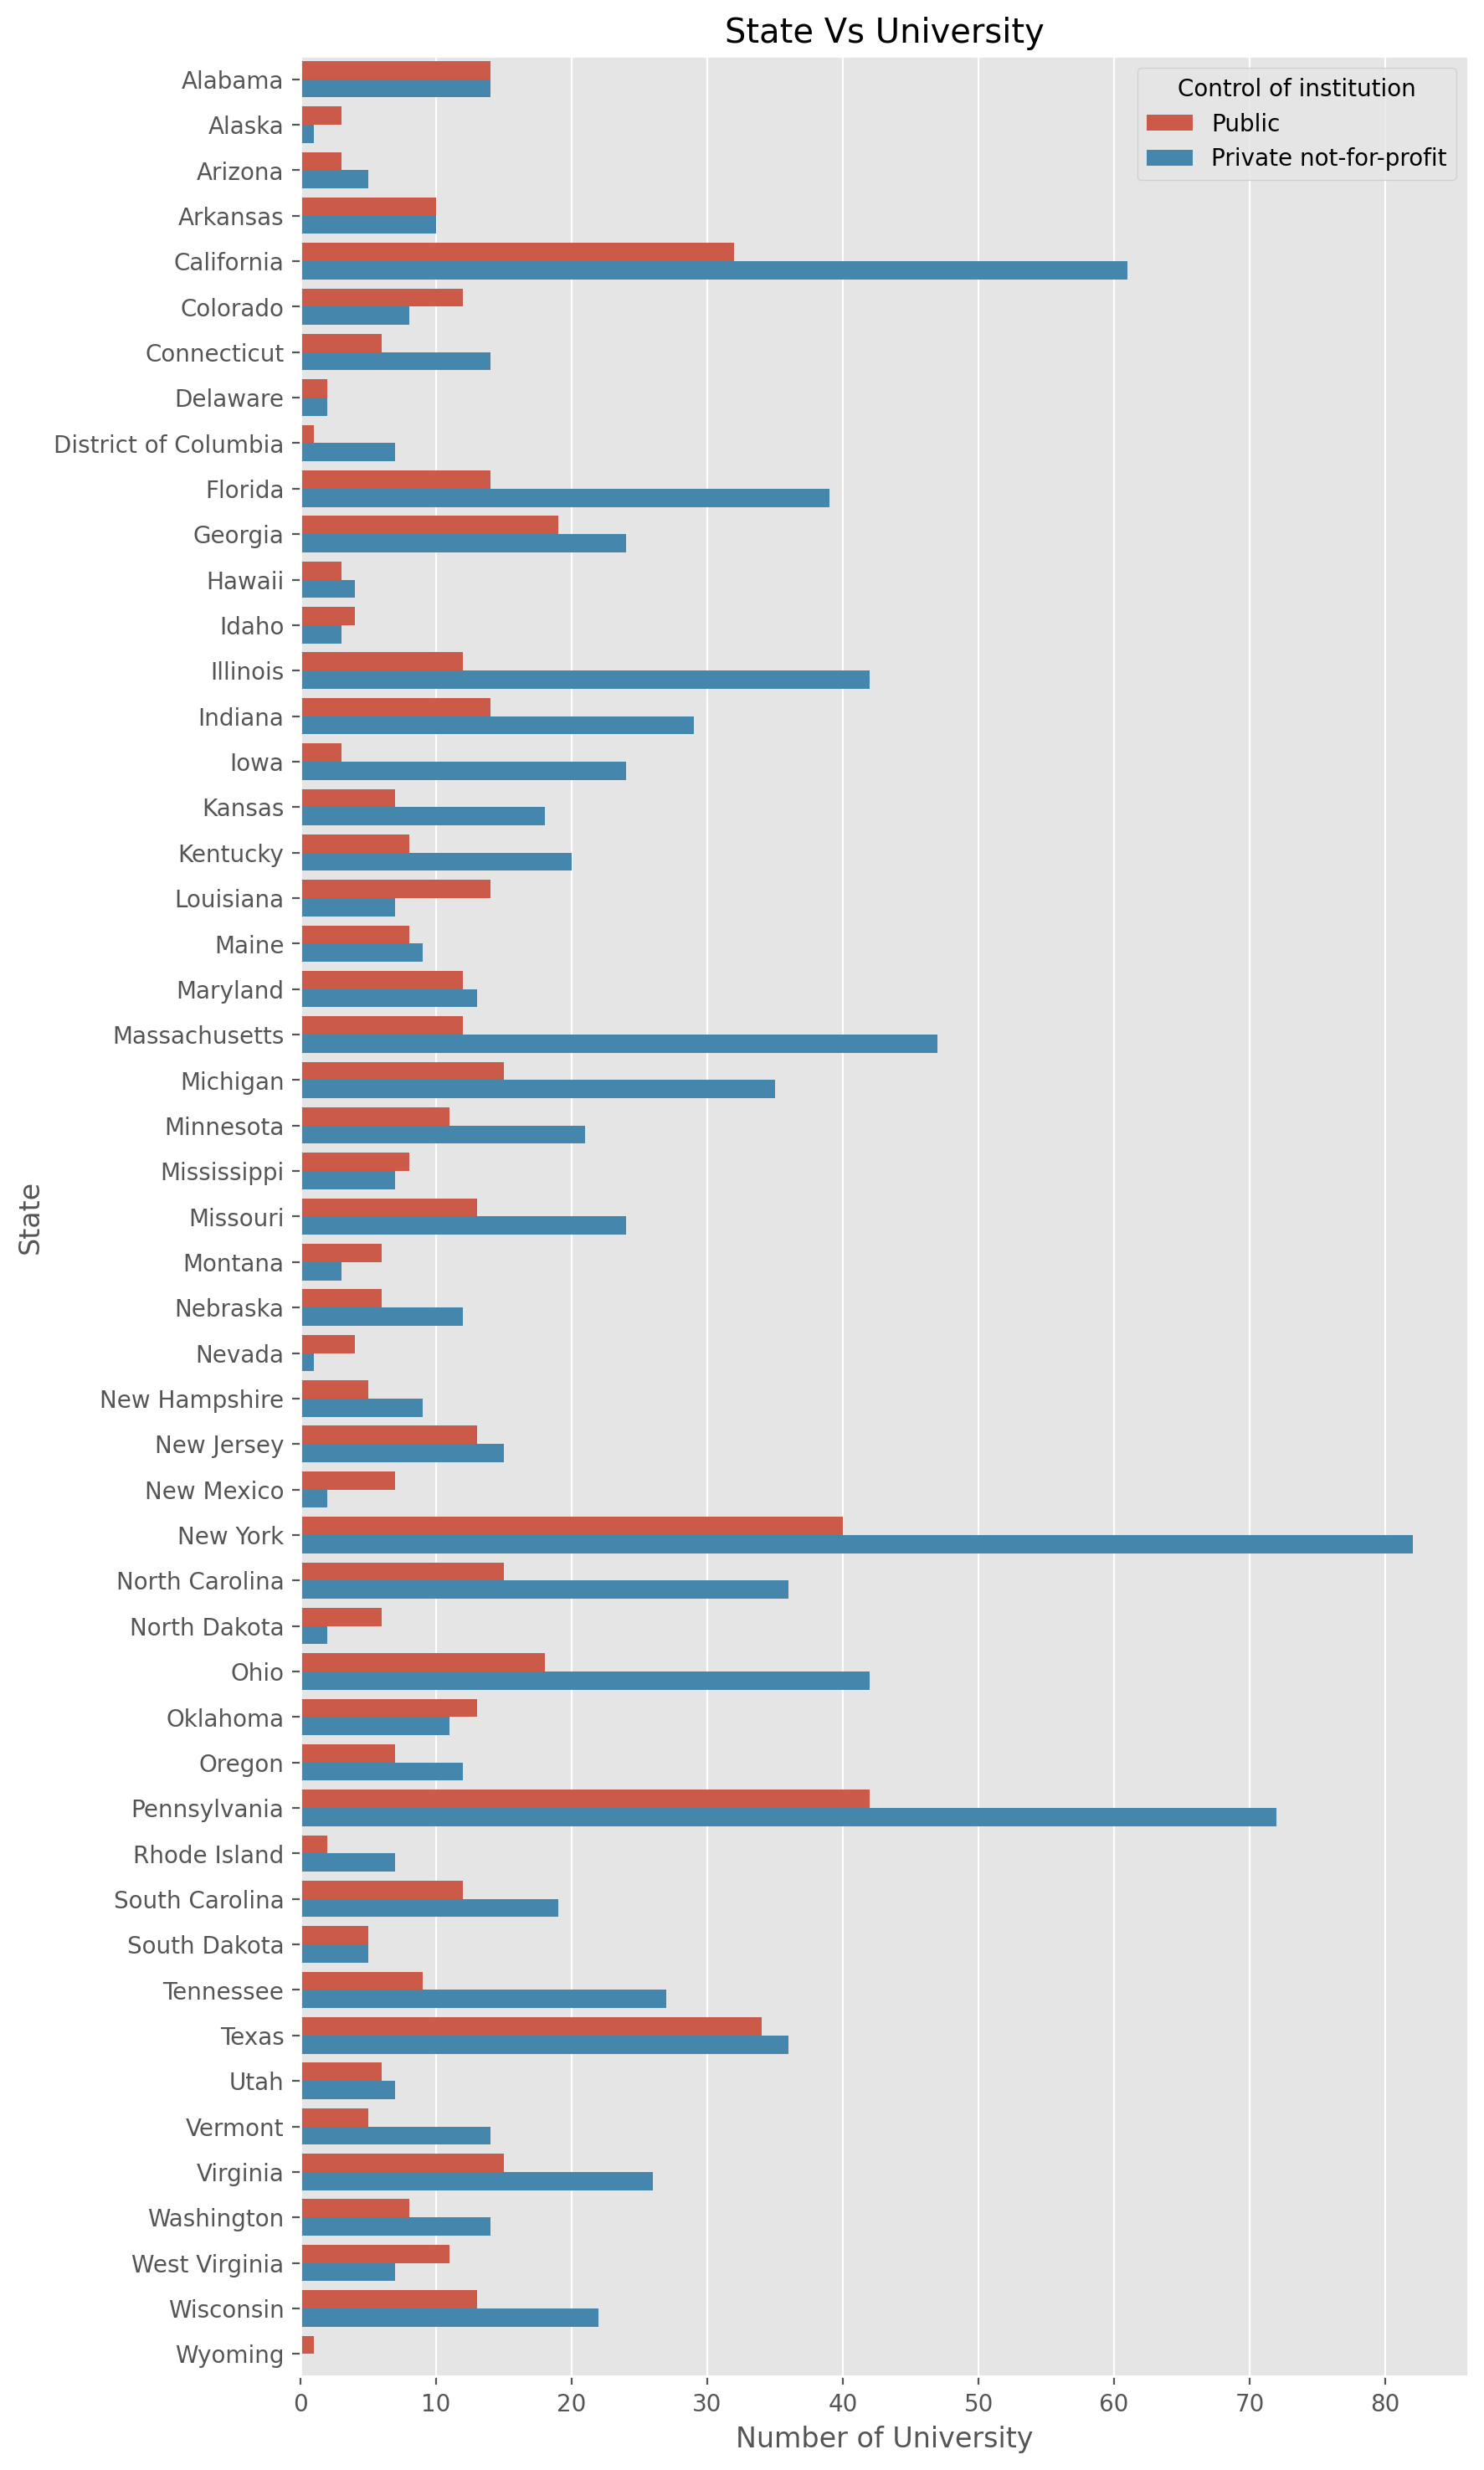

In [28]:
plt.figure(figsize=(9,18), dpi=200)
sns.countplot(y='State abbreviation', hue='Control of institution', data=df)
plt.title('State Vs University')
plt.ylabel("State")
plt.xlabel('Number of University')
plt.show

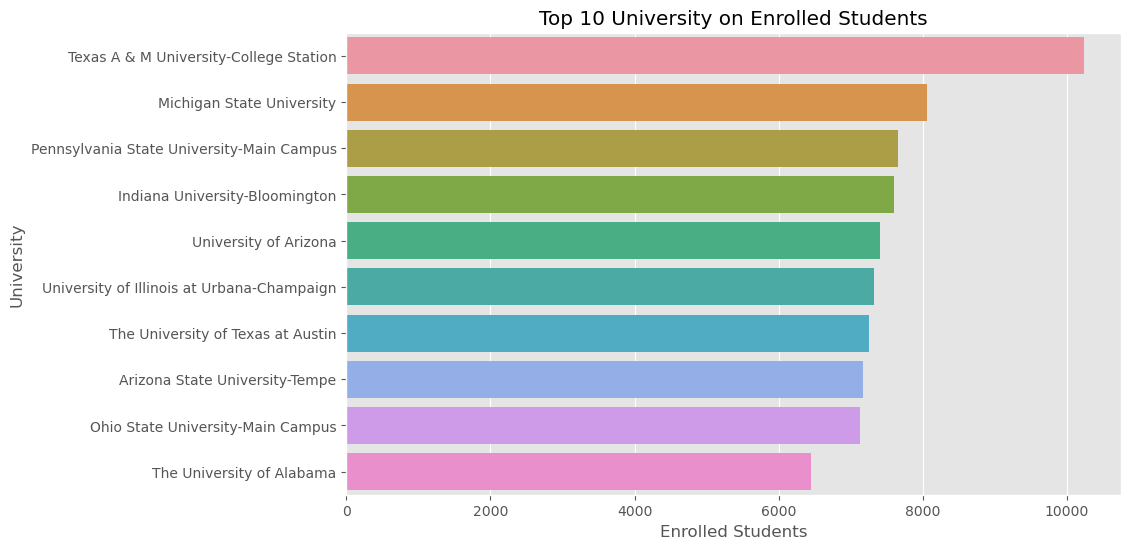

In [29]:
ust_en = df[['Name','Enrolled total']]
ust_en = ust_en.sort_values(by='Enrolled total', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Enrolled total', y='Name', data=ust_en)
plt.title('Top 10 University on Enrolled Students')
plt.xlabel('Enrolled Students')
plt.ylabel('University')
plt.show()

# 3. Quantitative and qualitative analysis

### 1.	Do universities with a high number of applications are the preferred ones by students? in other words, could the number of applications tell us that a university is one of the most preferred by students?

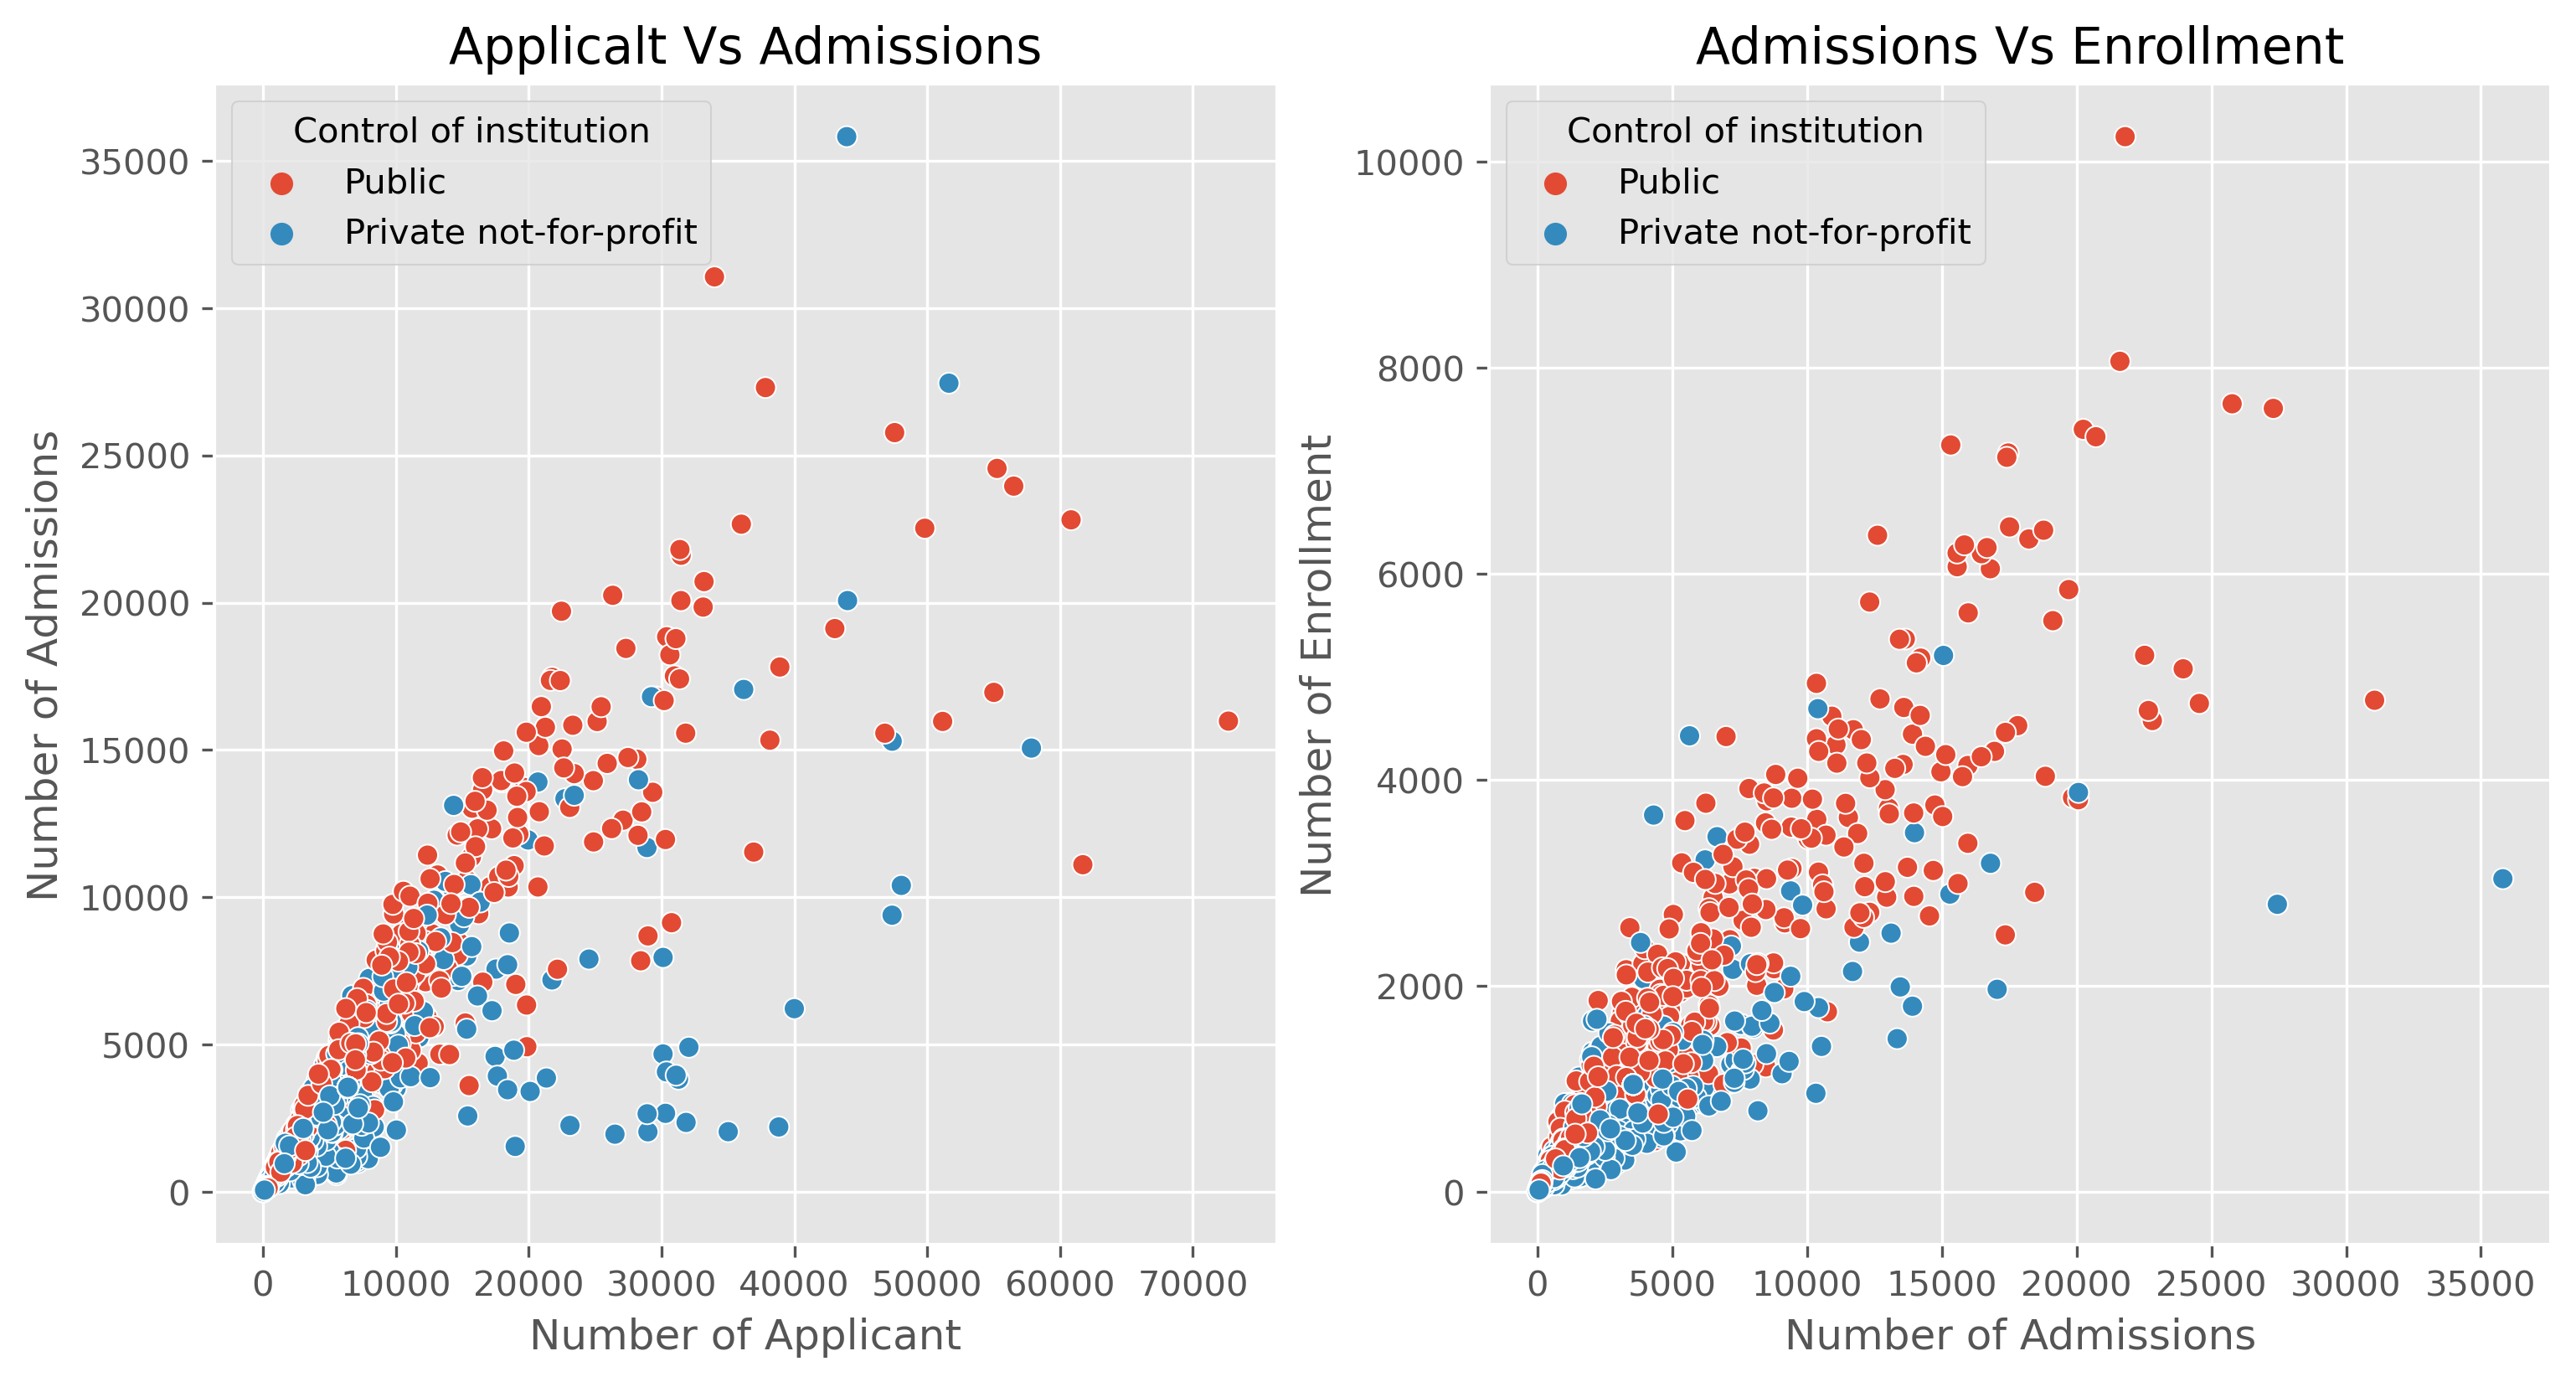

In [30]:
Q1 = df[['Name','Applicants total', 'Admissions total','Enrolled total','Control of institution','Tuition and fees, 2013-14','State abbreviation','Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14']]
plt.figure(figsize=(12,6), dpi=300)
plt.subplot(1,2,1)
sns.scatterplot(x='Applicants total', y='Admissions total',hue='Control of institution', data=Q1)
plt.xlabel('Number of Applicant')
plt.ylabel('Number of Admissions')
plt.title('Applicalt Vs Admissions')

plt.subplot(1,2,2)
sns.scatterplot(x='Admissions total', y='Enrolled total',hue='Control of institution', data=Q1)
plt.xlabel('Number of Admissions')
plt.ylabel('Number of Enrollment')
plt.title('Admissions Vs Enrollment')

plt.show()

### Q1 Inferences and Conclusions.
 - Yes, above scatter plot shows that, university with higher applicant tell us as most preferred compare to other.
 - This preference have more tenndency on public university with respect to private

### 2.	Do students prefer universities that have a high rate of admission? in other words, do students prefer a university where it is easier for them to be admitted?

In [31]:
Q2 = Q1
Q2['Admission_rate'] = (Q2['Admissions total']/Q2['Applicants total'])*100
Q2['Enorllment_rate'] = (Q2['Enrolled total']/Q2['Admissions total'])*100
Q2.head()

Name  Applicants total  Admissions total  \
0             Alabama A & M University       6142.000000       5521.000000   
1  University of Alabama at Birmingham       5689.000000       4934.000000   
2                   Amridge University       6391.193174       3554.880174   
3  University of Alabama in Huntsville       2054.000000       1656.000000   
4             Alabama State University      10245.000000       5251.000000   

   Enrolled total  Control of institution  Tuition and fees, 2013-14  \
0     1104.000000                  Public                     7182.0   
1     1773.000000                  Public                     7206.0   
2     1043.046478  Private not-for-profit                     6870.0   
3      651.000000                  Public                     9192.0   
4     1479.000000                  Public                     8720.0   

  State abbreviation  \
0            Alabama   
1            Alabama   
2            Alabama   
3            Alabama   
4            Alabama   

   Total price for in-state students living on campus 2013-14  \
0                                       21849.000000            
1                                       22495.000000            
2                                       34935.306429            
3                                       23466.000000            
4                                       18286.000000            

   Total price for out-of-state students living on campus 2013-14  \
0                                       27441.000000                
1                                       31687.000000                
2                                       38767.612857                
3                                       35780.000000                
4                                       25222.000000                

   Admission_rate  Enorllment_rate  
0       89.889287        19.996377  
1       86.728775        35.934333  
2       55.621542        29.341256  
3       80.623174        39.311594  
4       51.254270        28.166064

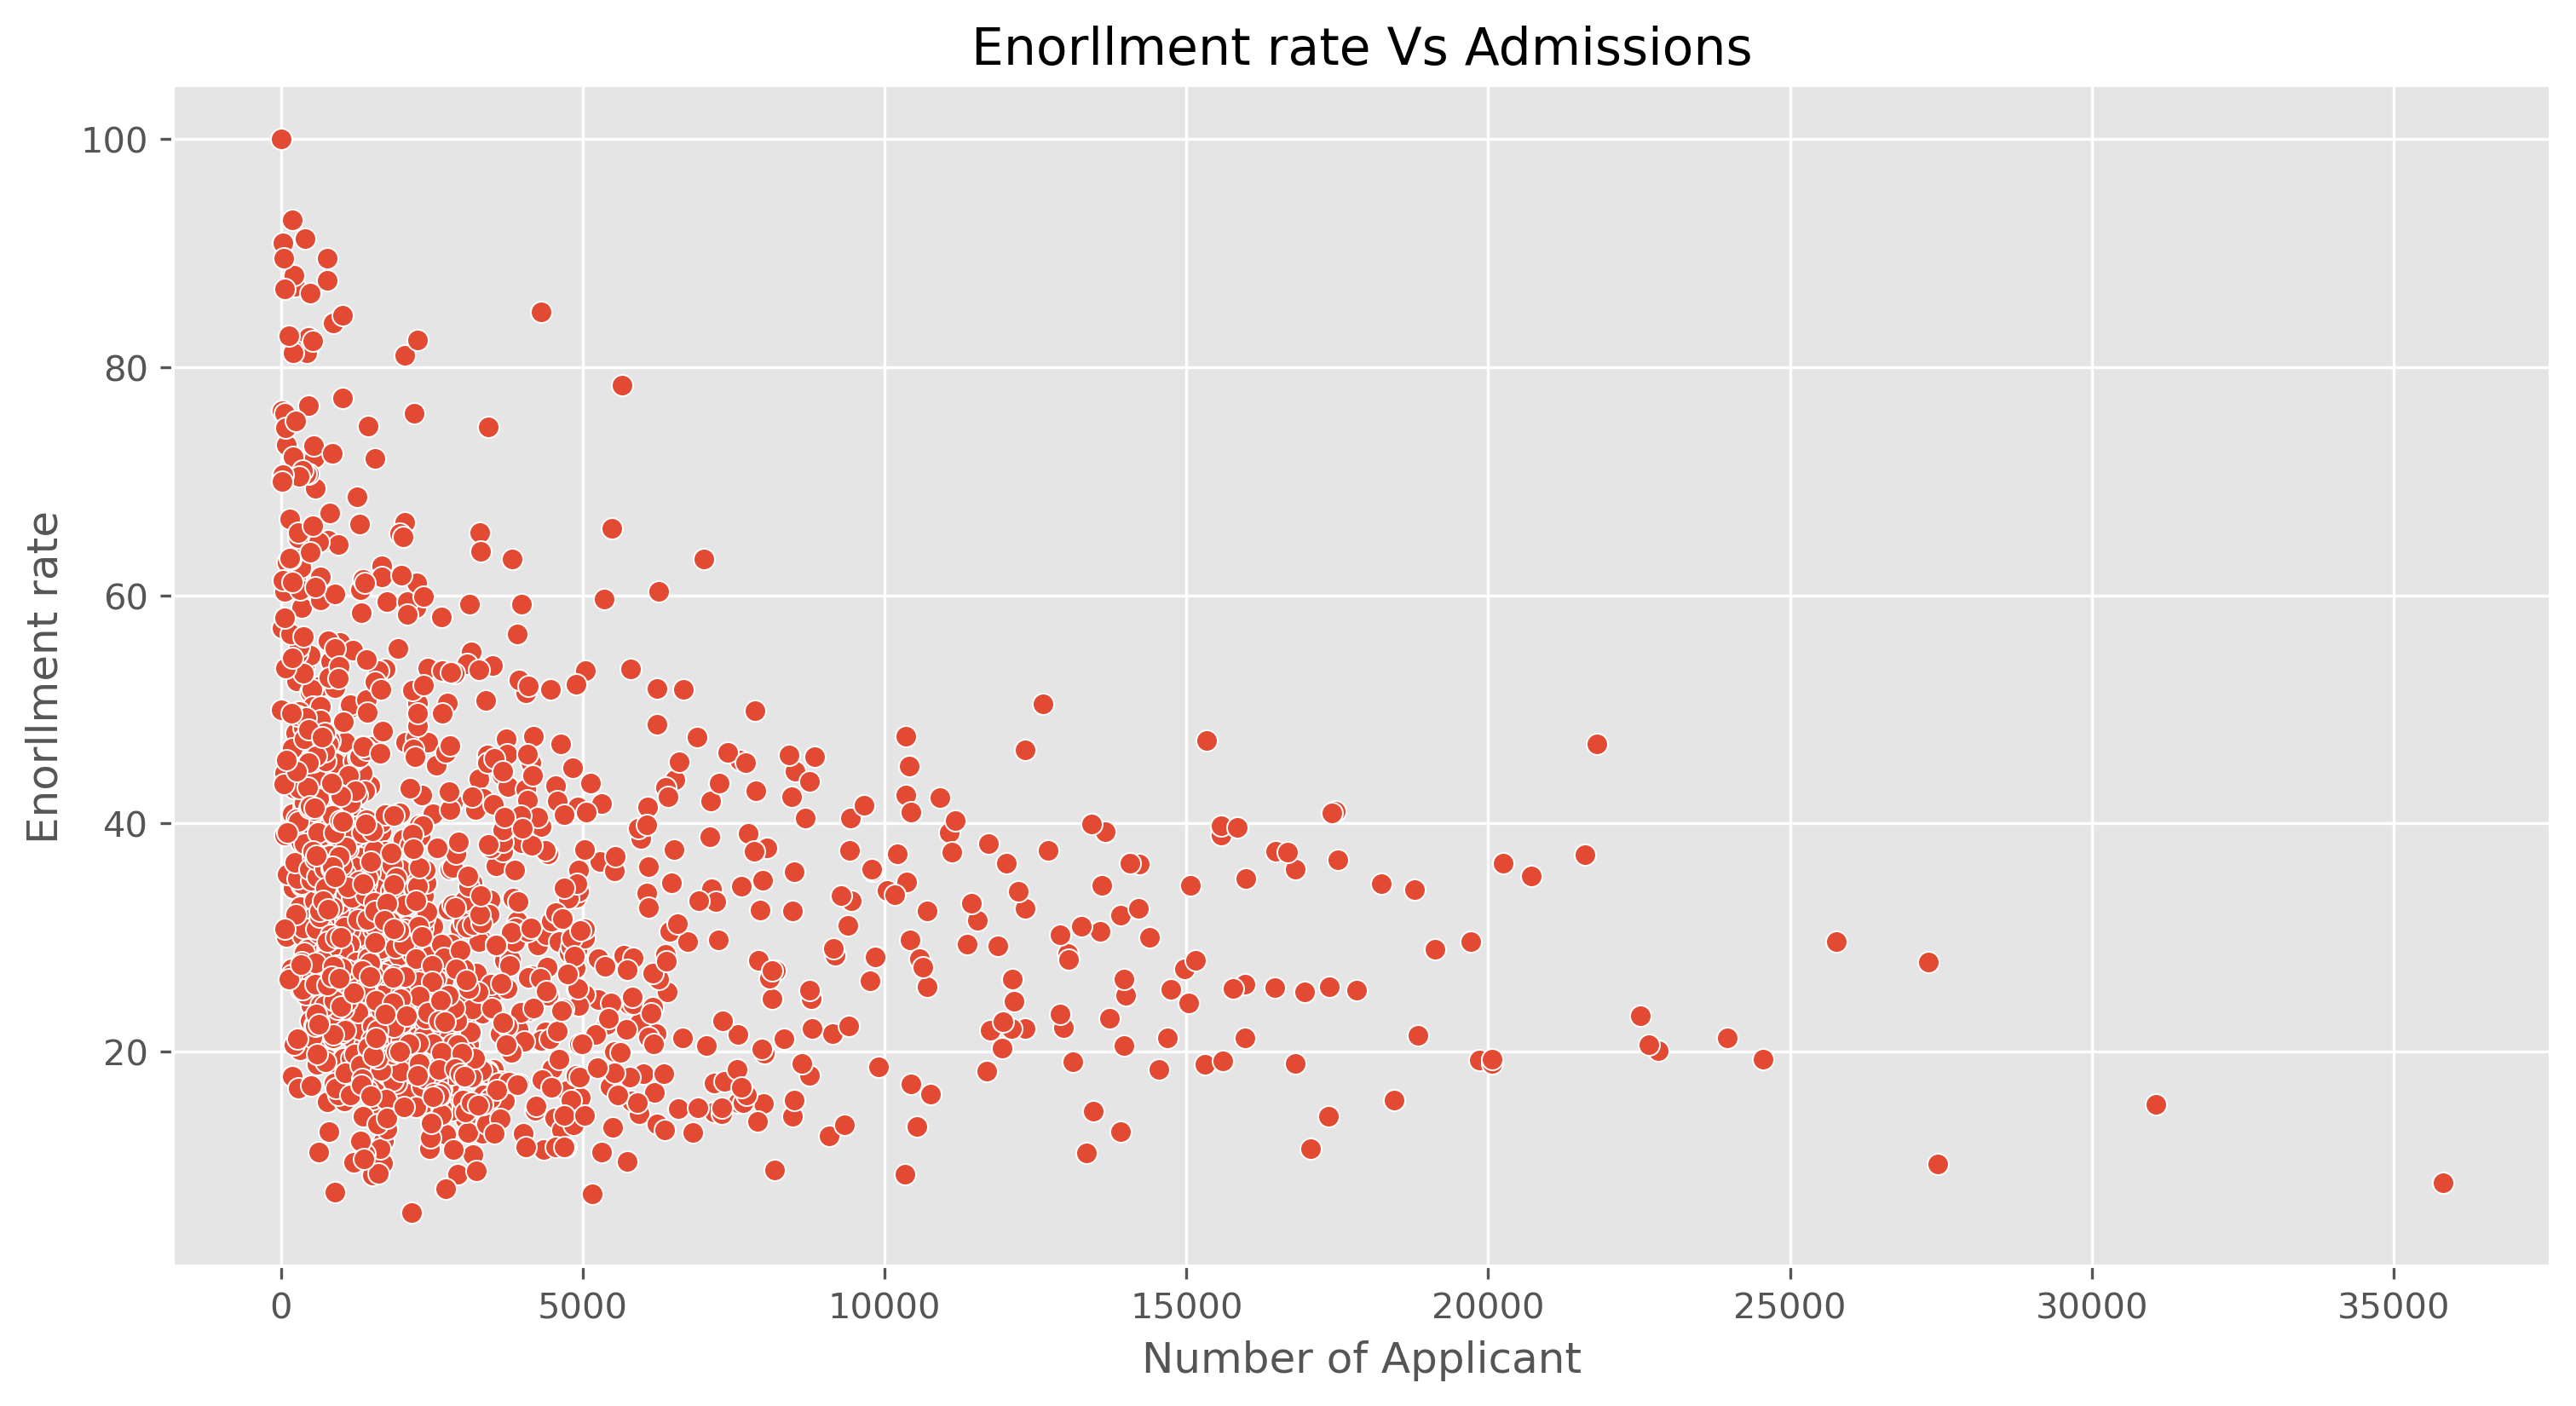

In [32]:
plt.figure(figsize=(12,6), dpi=300)
sns.scatterplot(x='Admissions total', y='Enorllment_rate', data=Q1)
plt.xlabel('Number of Applicant')
plt.ylabel('Enorllment rate')
plt.title('Enorllment rate Vs Admissions')


plt.show()

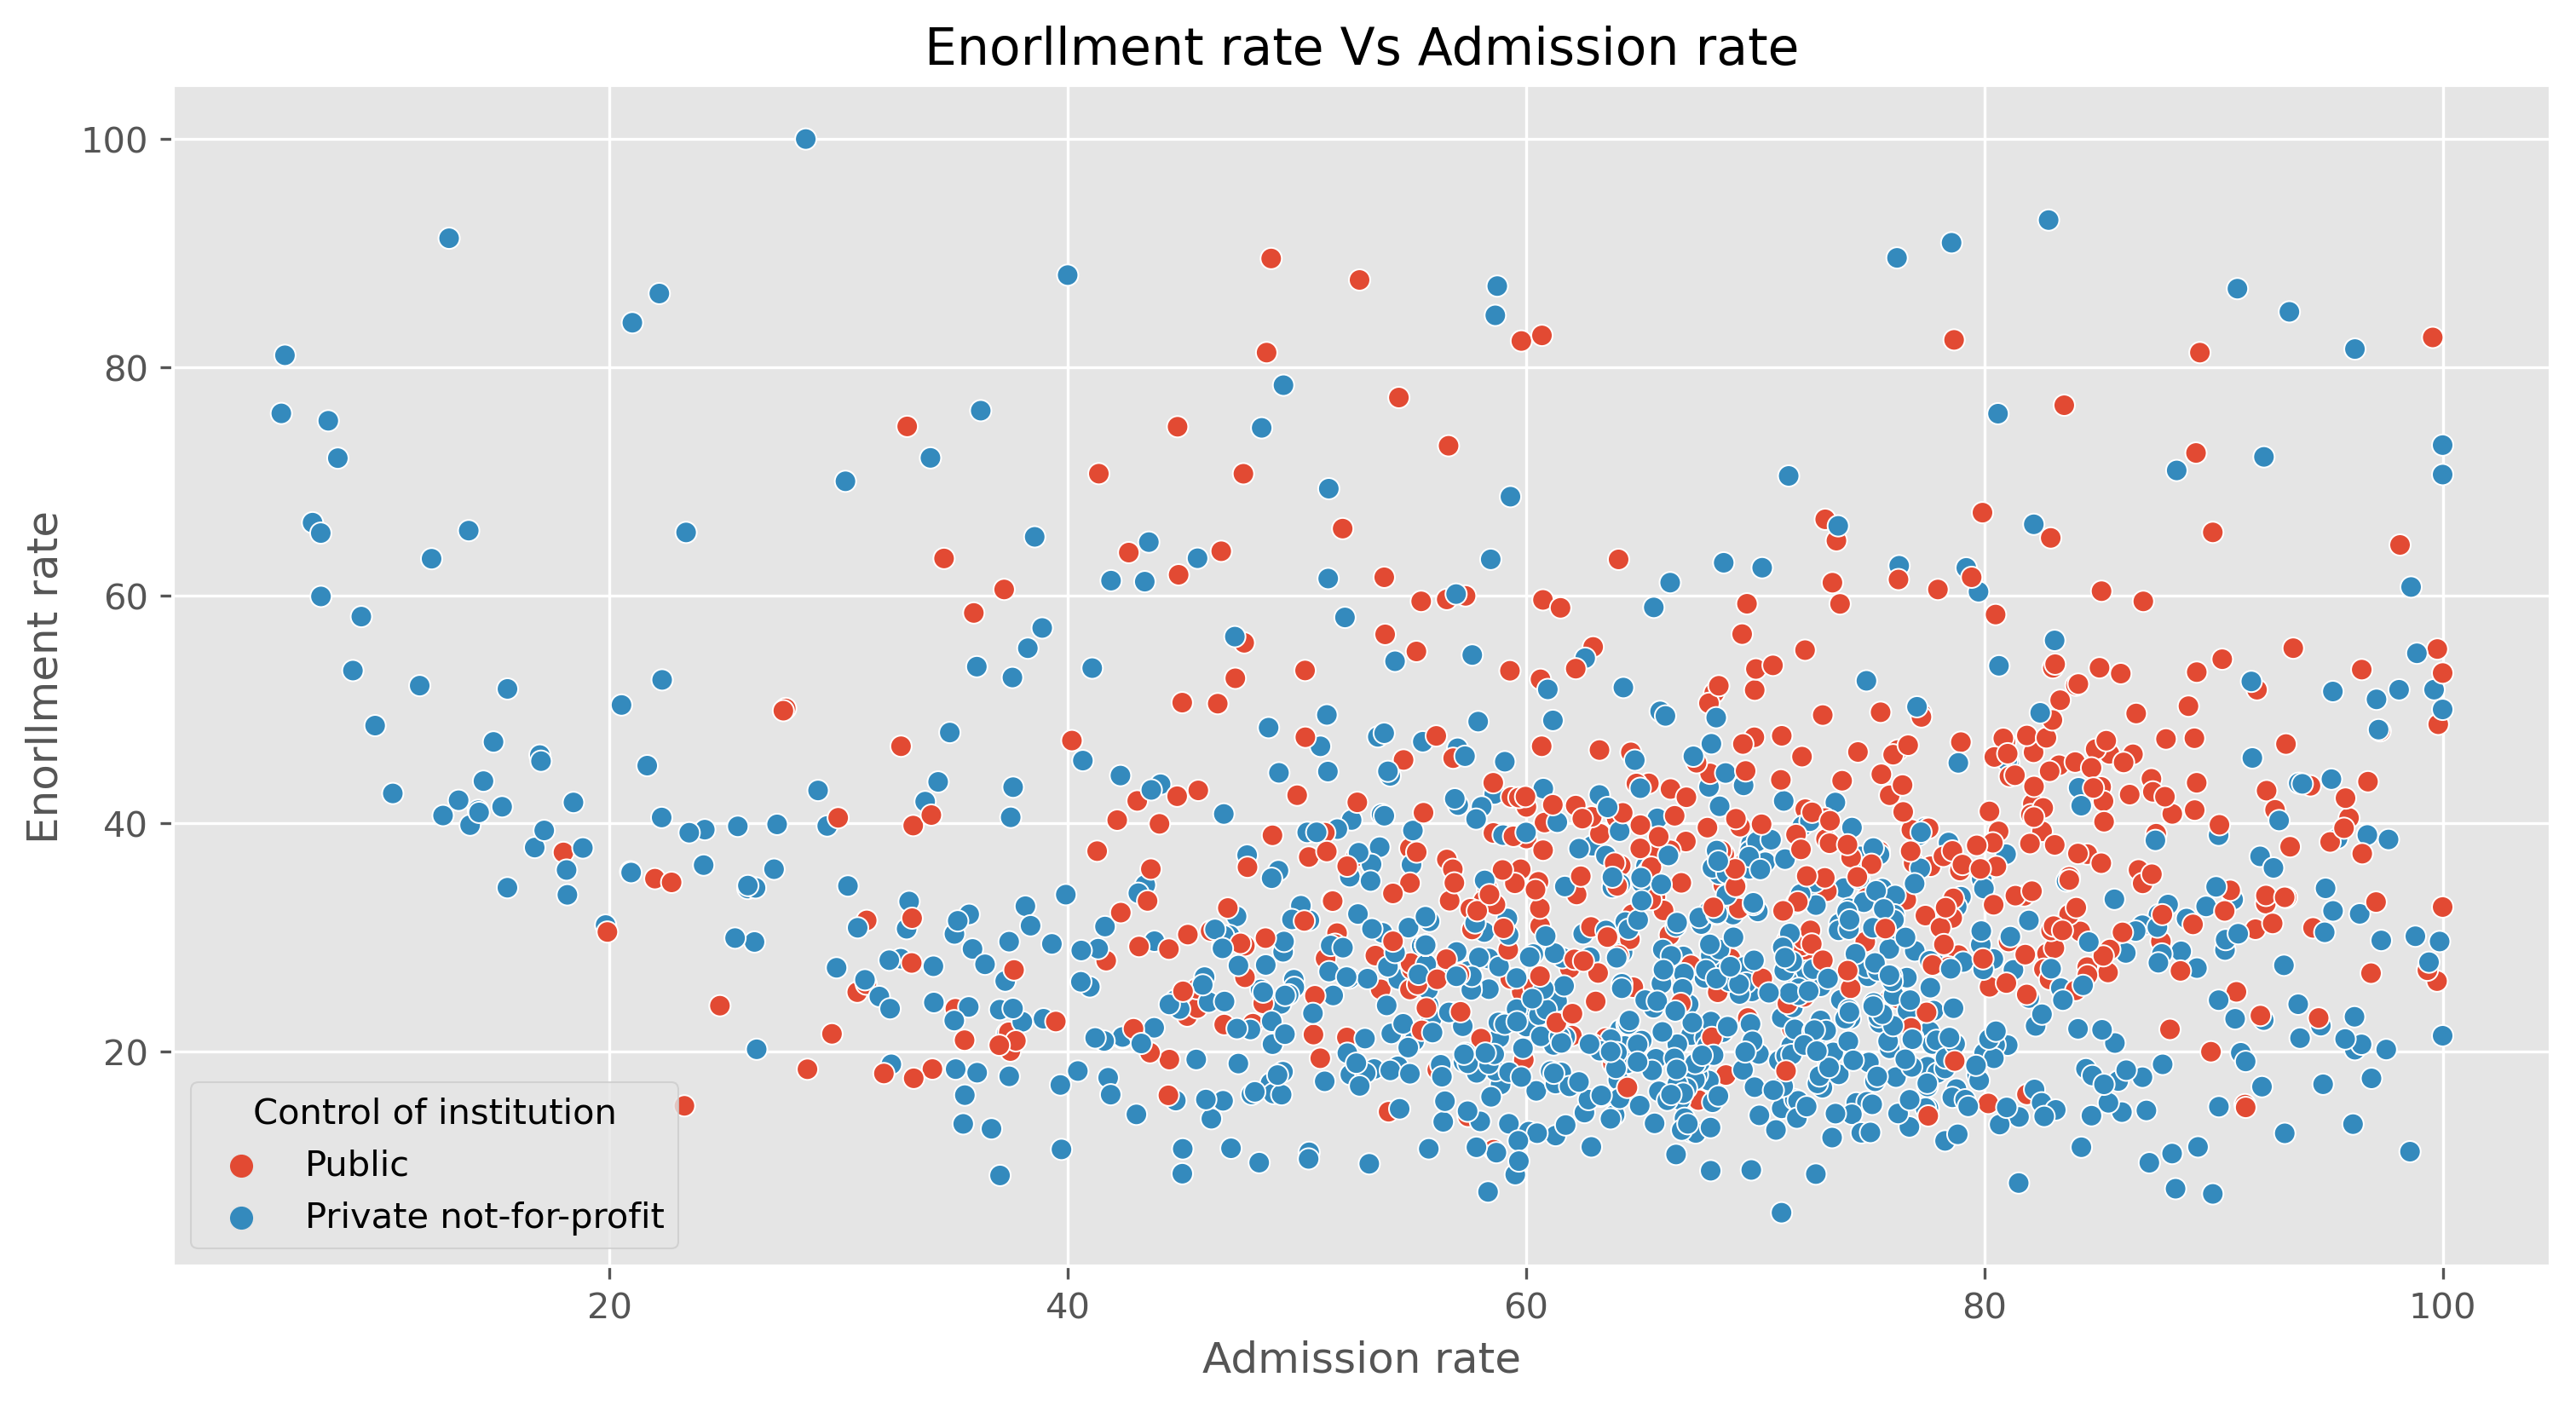

In [33]:
plt.figure(figsize=(12,6), dpi=300)
sns.scatterplot(x='Admission_rate', y='Enorllment_rate',hue='Control of institution', data=Q1)
plt.xlabel('Admission rate')
plt.ylabel('Enorllment rate')
plt.title('Enorllment rate Vs Admission rate')


plt.show()

In [34]:
Q2.columns

Index(['Name', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Control of institution', 'Tuition and fees, 2013-14',
       'State abbreviation',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Admission_rate', 'Enorllment_rate'],
      dtype='object')

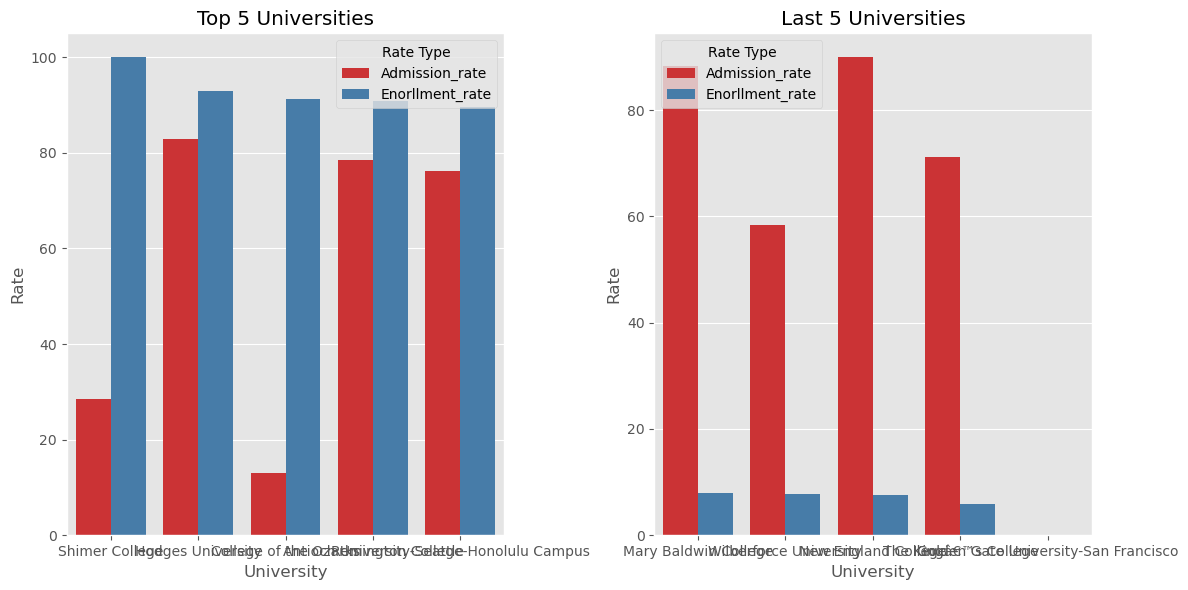

In [35]:
# Sample DataFrame (replace this with your actual DataFrame)
Q3 = Q2[['Name', 'Admission_rate', 'Enorllment_rate']].sort_values(by='Enorllment_rate', ascending=False)

top_5 = Q3.head(5)
# Melt the DataFrame to create a long-form version
df_tm = top_5.melt(id_vars='Name', var_name='Rate Type', value_name='Rate')

# Convert 'Rate' column to numeric if it's not already
df_tm['Rate'] = pd.to_numeric(df_tm['Rate'], errors='coerce')

last_5 = Q3.tail(5)
# Melt the DataFrame to create a long-form version
df_lm = last_5.melt(id_vars='Name', var_name='Rate Type', value_name='Rate')

# Convert 'Rate' column to numeric if it's not already
df_lm['Rate'] = pd.to_numeric(df_lm['Rate'], errors='coerce')

# Create a bar plot with seaborn
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Name', y='Rate', hue='Rate Type', data=df_tm, palette='Set1')

# Customize the plot
plt.title('Top 5 Universities')
plt.xlabel('University')
plt.ylabel('Rate')
plt.legend(title='Rate Type')

plt.subplot(1, 2, 2)
sns.barplot(x='Name', y='Rate', hue='Rate Type', data=df_lm, palette='Set1')

# Customize the plot
plt.title('Last 5 Universities')
plt.xlabel('University')
plt.ylabel('Rate')
plt.legend(title='Rate Type')
plt.tight_layout()
plt.show()


### Q2 Inferences and Conclusions.
 - Application for lower enrollment rate is more compare to higher
 - It show that student prefer more on low enrolment rate university
 - Admission rate does not effect of enrollment rate, as enrolment rate increase, that dosent effect on enrolment.
 - While comparing with top 5 enrolment university, we can find that enrolment rate is greater that admission rate. It show if peopleaccecpt admission, there is high chance to choose that university.
 - This cannot seen in case of in case of last 5 university, as it's Enrolment is comparitivily low with respect to Admission rate. It show that, student dosent prefer much on such university.
 - We can do another observation that, 100% enrolment rate on lowest applicant university and highest applicat can be seen in lowest enrolment rate university.

### 3.	Do students prefer public or private universities?

<Axes: xlabel='Control of institution', ylabel='Enrolled total'>

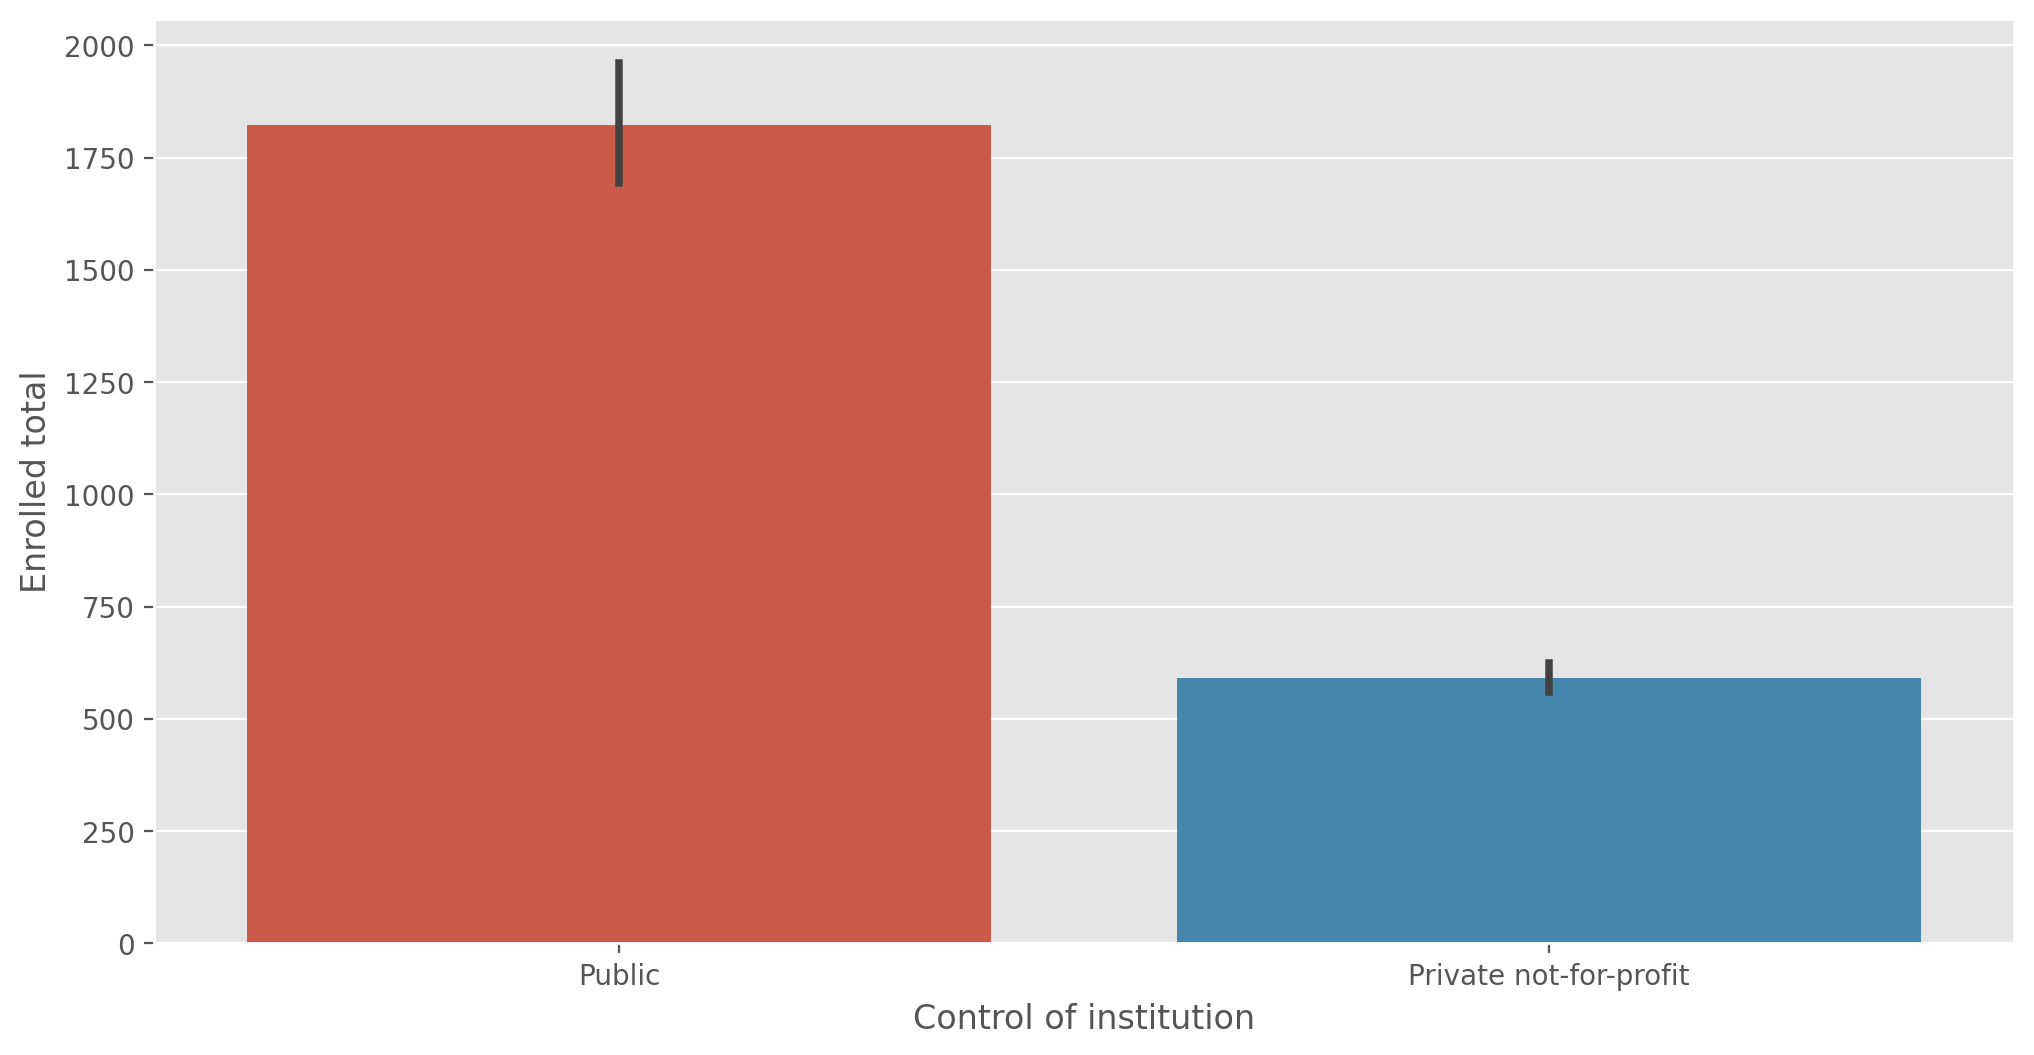

In [36]:
plt.figure(figsize=(12,6), dpi=200)
sns.barplot(y=Q2['Enrolled total'], x=Q2['Control of institution'])

### Q3 Inferences and Conclusions.
 - Student prefer more public university compare to private university

### 4.	Do students prefer universities with low tuition and fees?

In [37]:
Q2.columns

Index(['Name', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Control of institution', 'Tuition and fees, 2013-14',
       'State abbreviation',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Admission_rate', 'Enorllment_rate'],
      dtype='object')

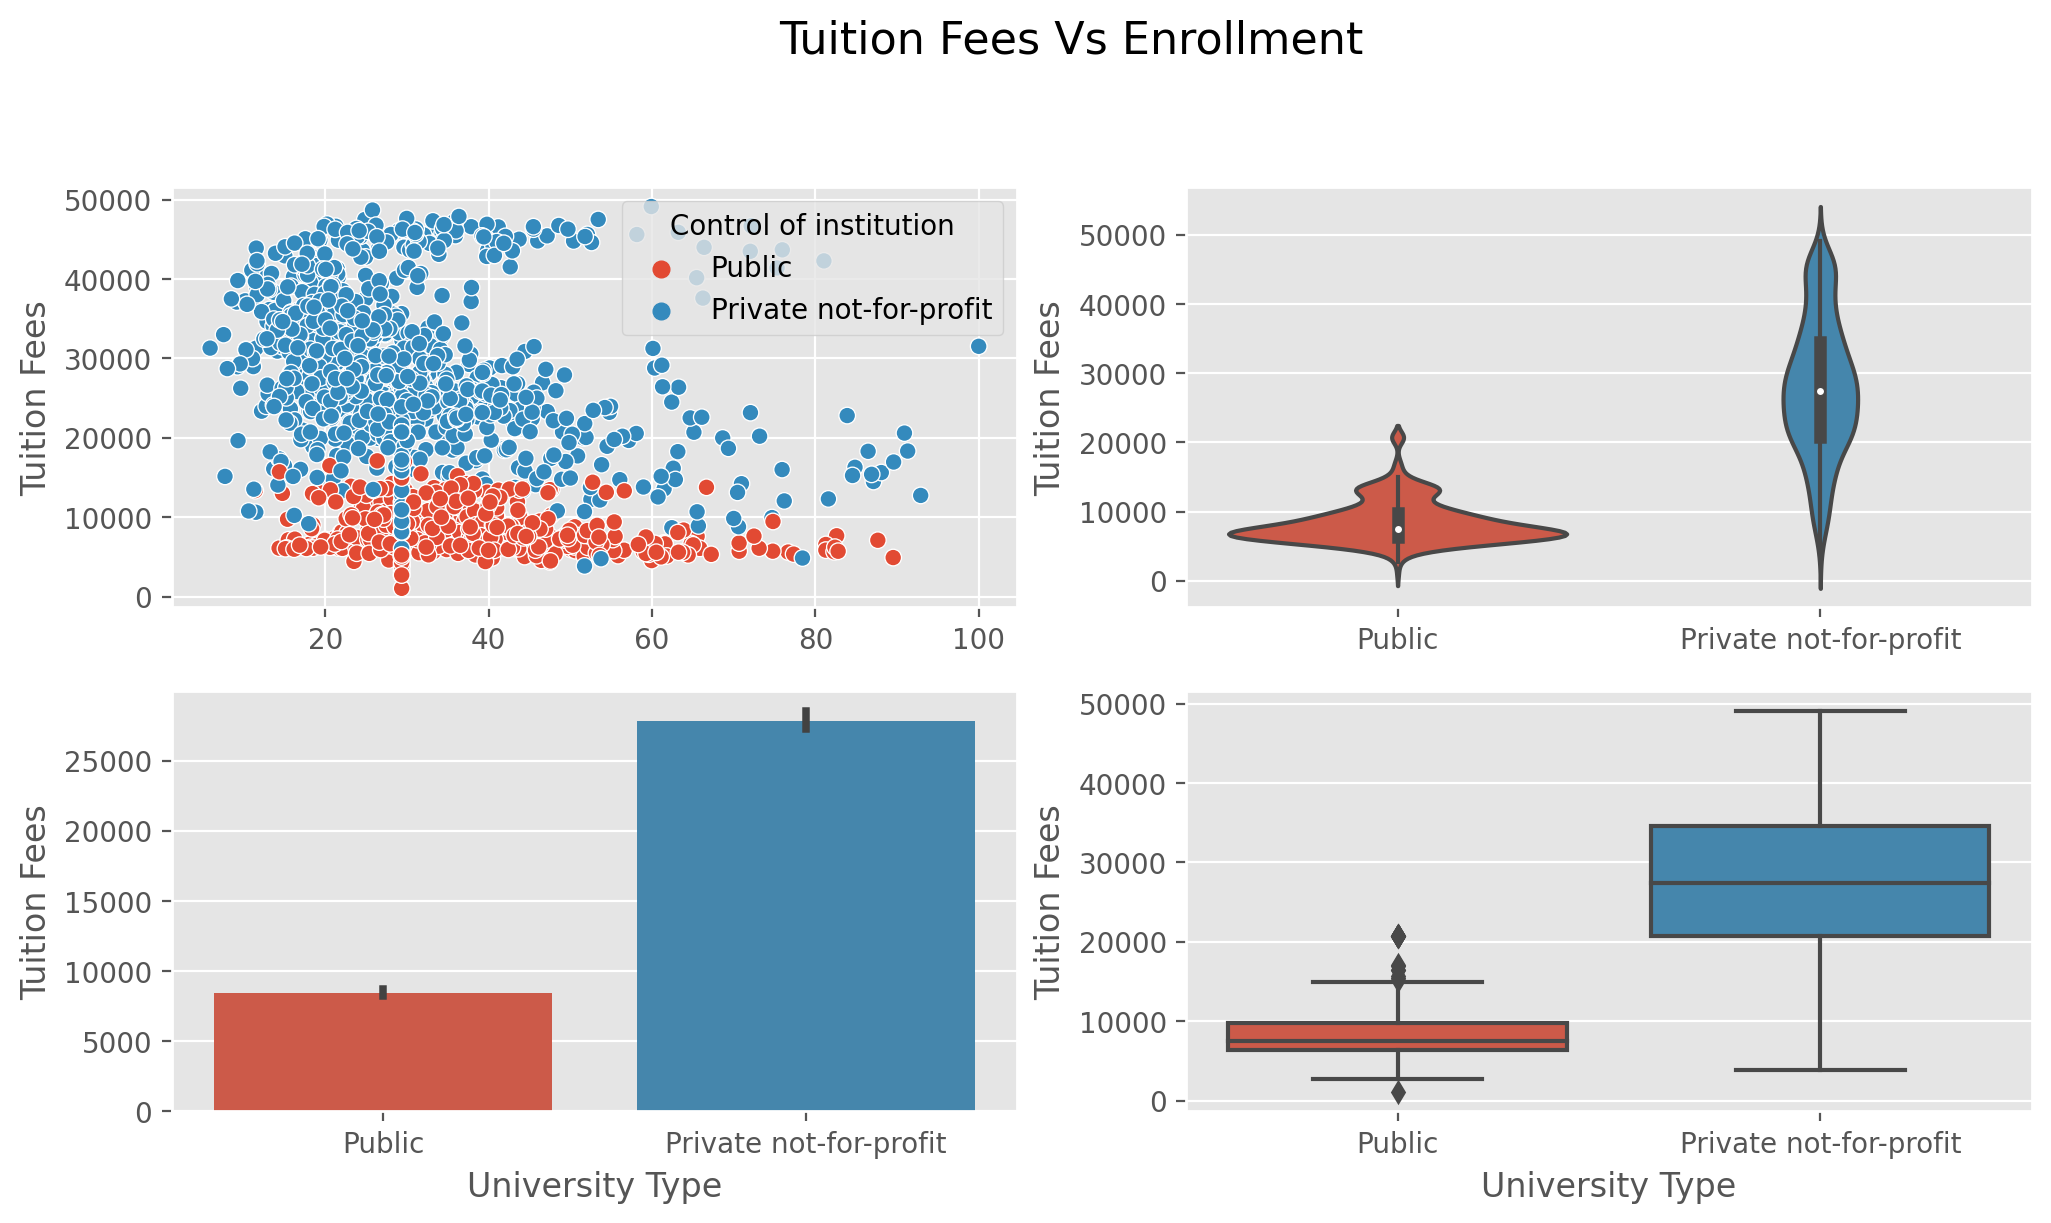

In [38]:
plt.figure(figsize=(12,6), dpi=200)
plt.suptitle("Tuition Fees Vs Enrollment", y=1.02, fontsize=16)
plt.subplot(2,2,1)
sns.scatterplot(y='Tuition and fees, 2013-14',x='Enorllment_rate',hue='Control of institution', data=Q2)
plt.ylabel("Tuition Fees")
plt.xlabel("")

plt.subplot(2,2,2)
sns.violinplot(x='Control of institution',y='Tuition and fees, 2013-14', data=Q2)
plt.ylabel("Tuition Fees")
plt.xlabel("")

plt.subplot(2,2,3)
sns.barplot(x='Control of institution',y='Tuition and fees, 2013-14', data=Q2)
plt.ylabel("Tuition Fees")
plt.xlabel("University Type")

plt.subplot(2,2,4)
sns.boxplot(x='Control of institution',y='Tuition and fees, 2013-14', data=Q2)
plt.ylabel("Tuition Fees")
plt.xlabel("University Type")

plt.show()

### Q4 Inferences and Conclusions.

 - In gereral, Student prefer low tution fees university with respect to high tution university
 - Analysis shows that public university are comparitively cheap compare to private in america
 - Prefered range od tuition fees in public university are around 9000 doller and private university range between 20k to 30k doller 

### 5.	Do students prefer a university for its low on-campus cost of living?

<Axes: xlabel='Total price for out-of-state students living on campus 2013-14', ylabel='Enorllment_rate'>

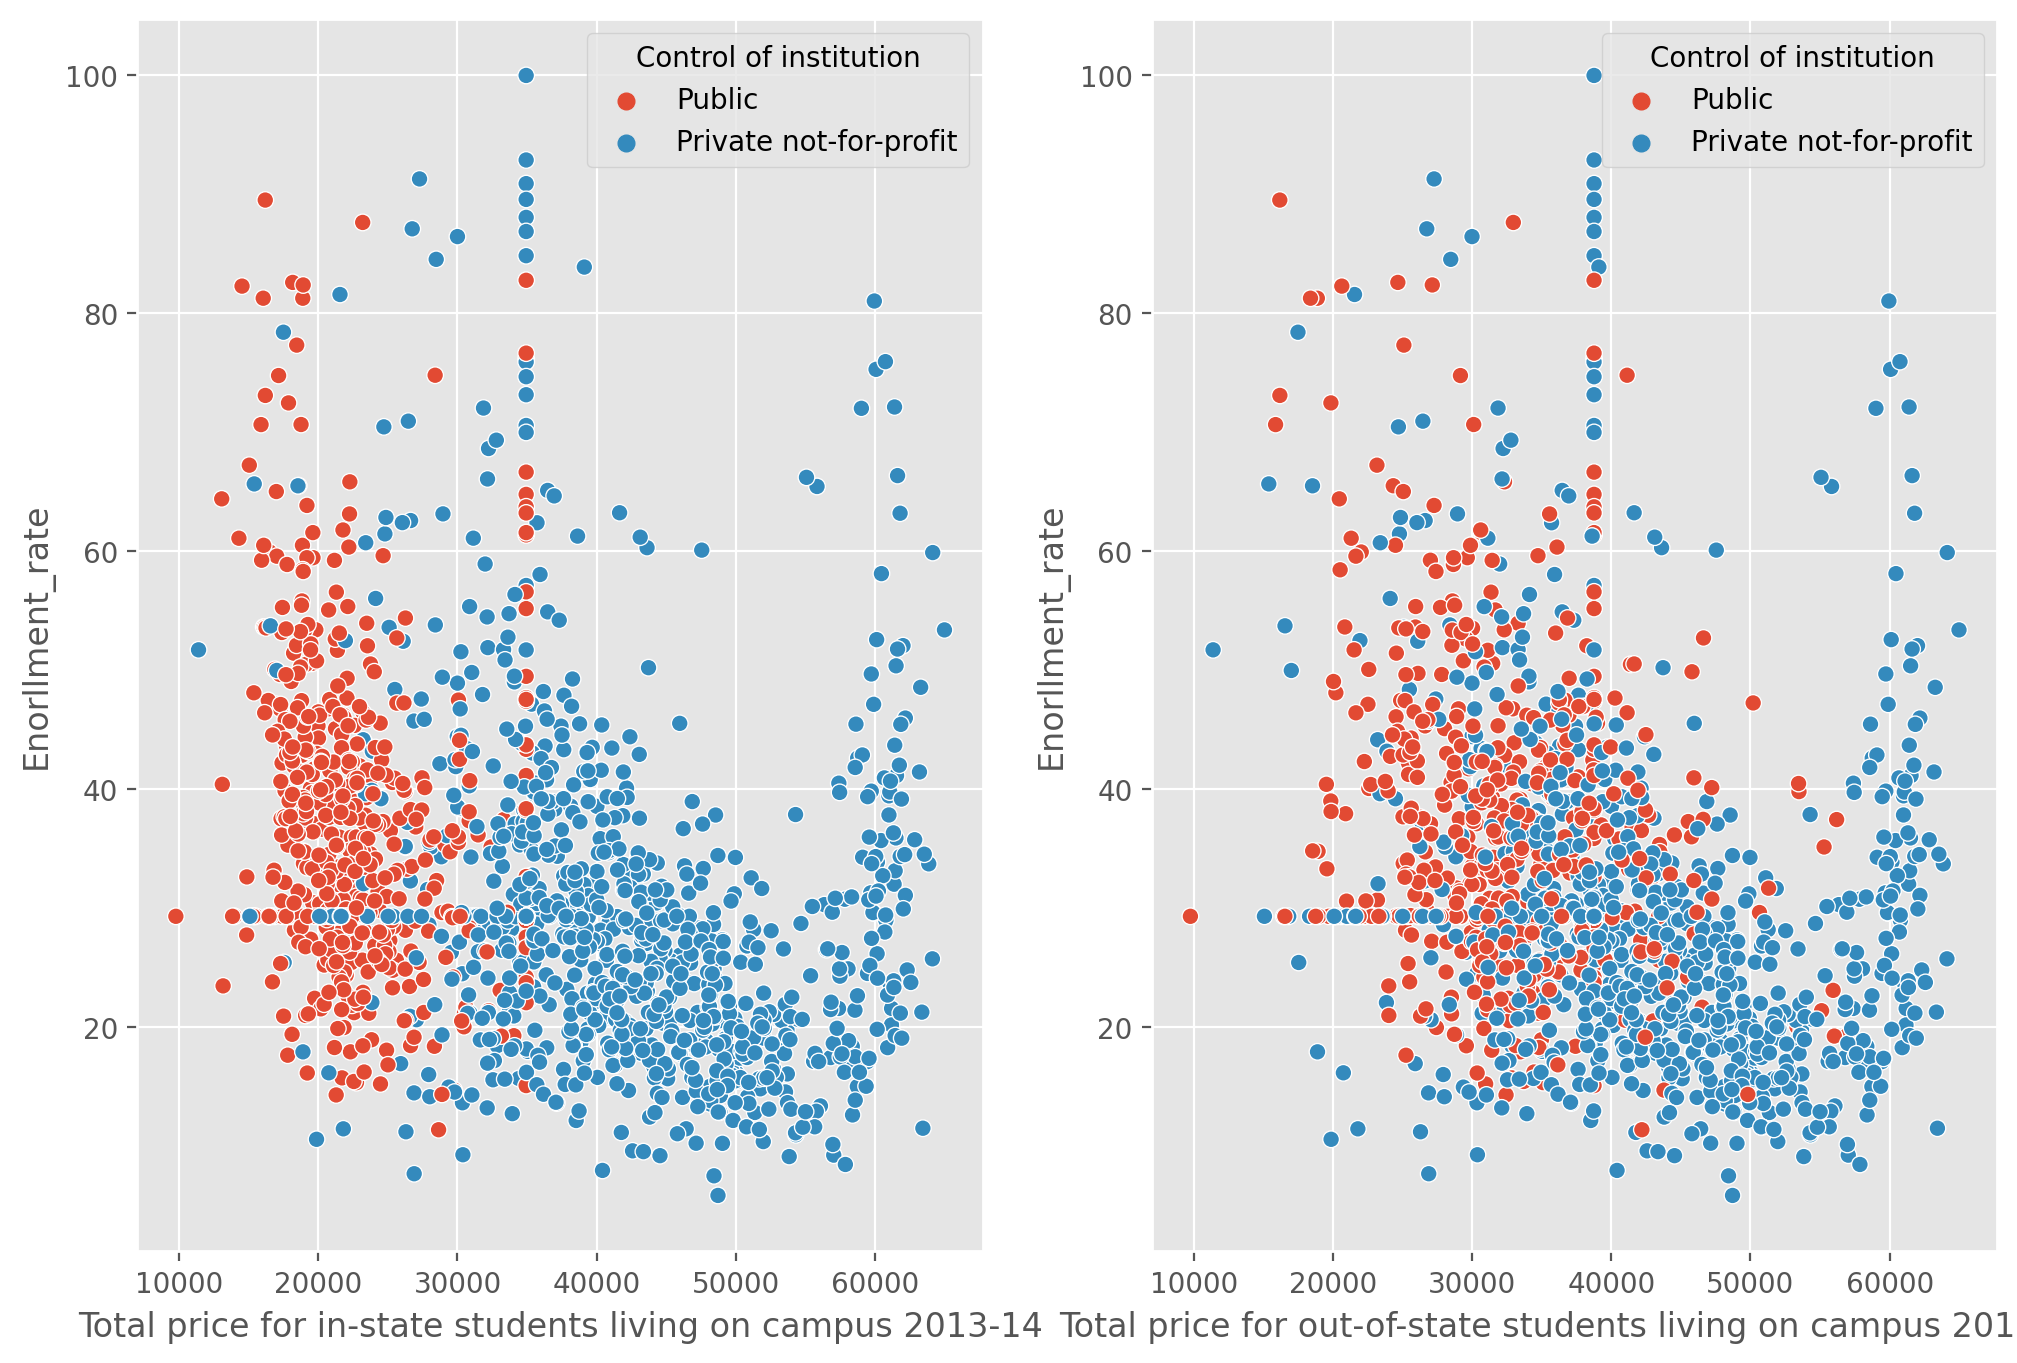

In [48]:
Q5 = Q2[['Total price for in-state students living on campus 2013-14','Total price for out-of-state students living on campus 2013-14','Enorllment_rate','Enrolled total','Control of institution']]
plt.figure(figsize=(12,8), dpi=200)
plt.subplot(1,2,1)
sns.scatterplot(x='Total price for in-state students living on campus 2013-14', y='Enorllment_rate', data=Q5,hue='Control of institution')

plt.subplot(1,2,2)
sns.scatterplot(x='Total price for out-of-state students living on campus 2013-14', y='Enorllment_rate', data=Q5,hue='Control of institution')


### Q4 Inferences and Conclusions.
 - Above analysis didnt show any relatioship between Living expance

### 6.	Do students prefer universities from highly populated states?

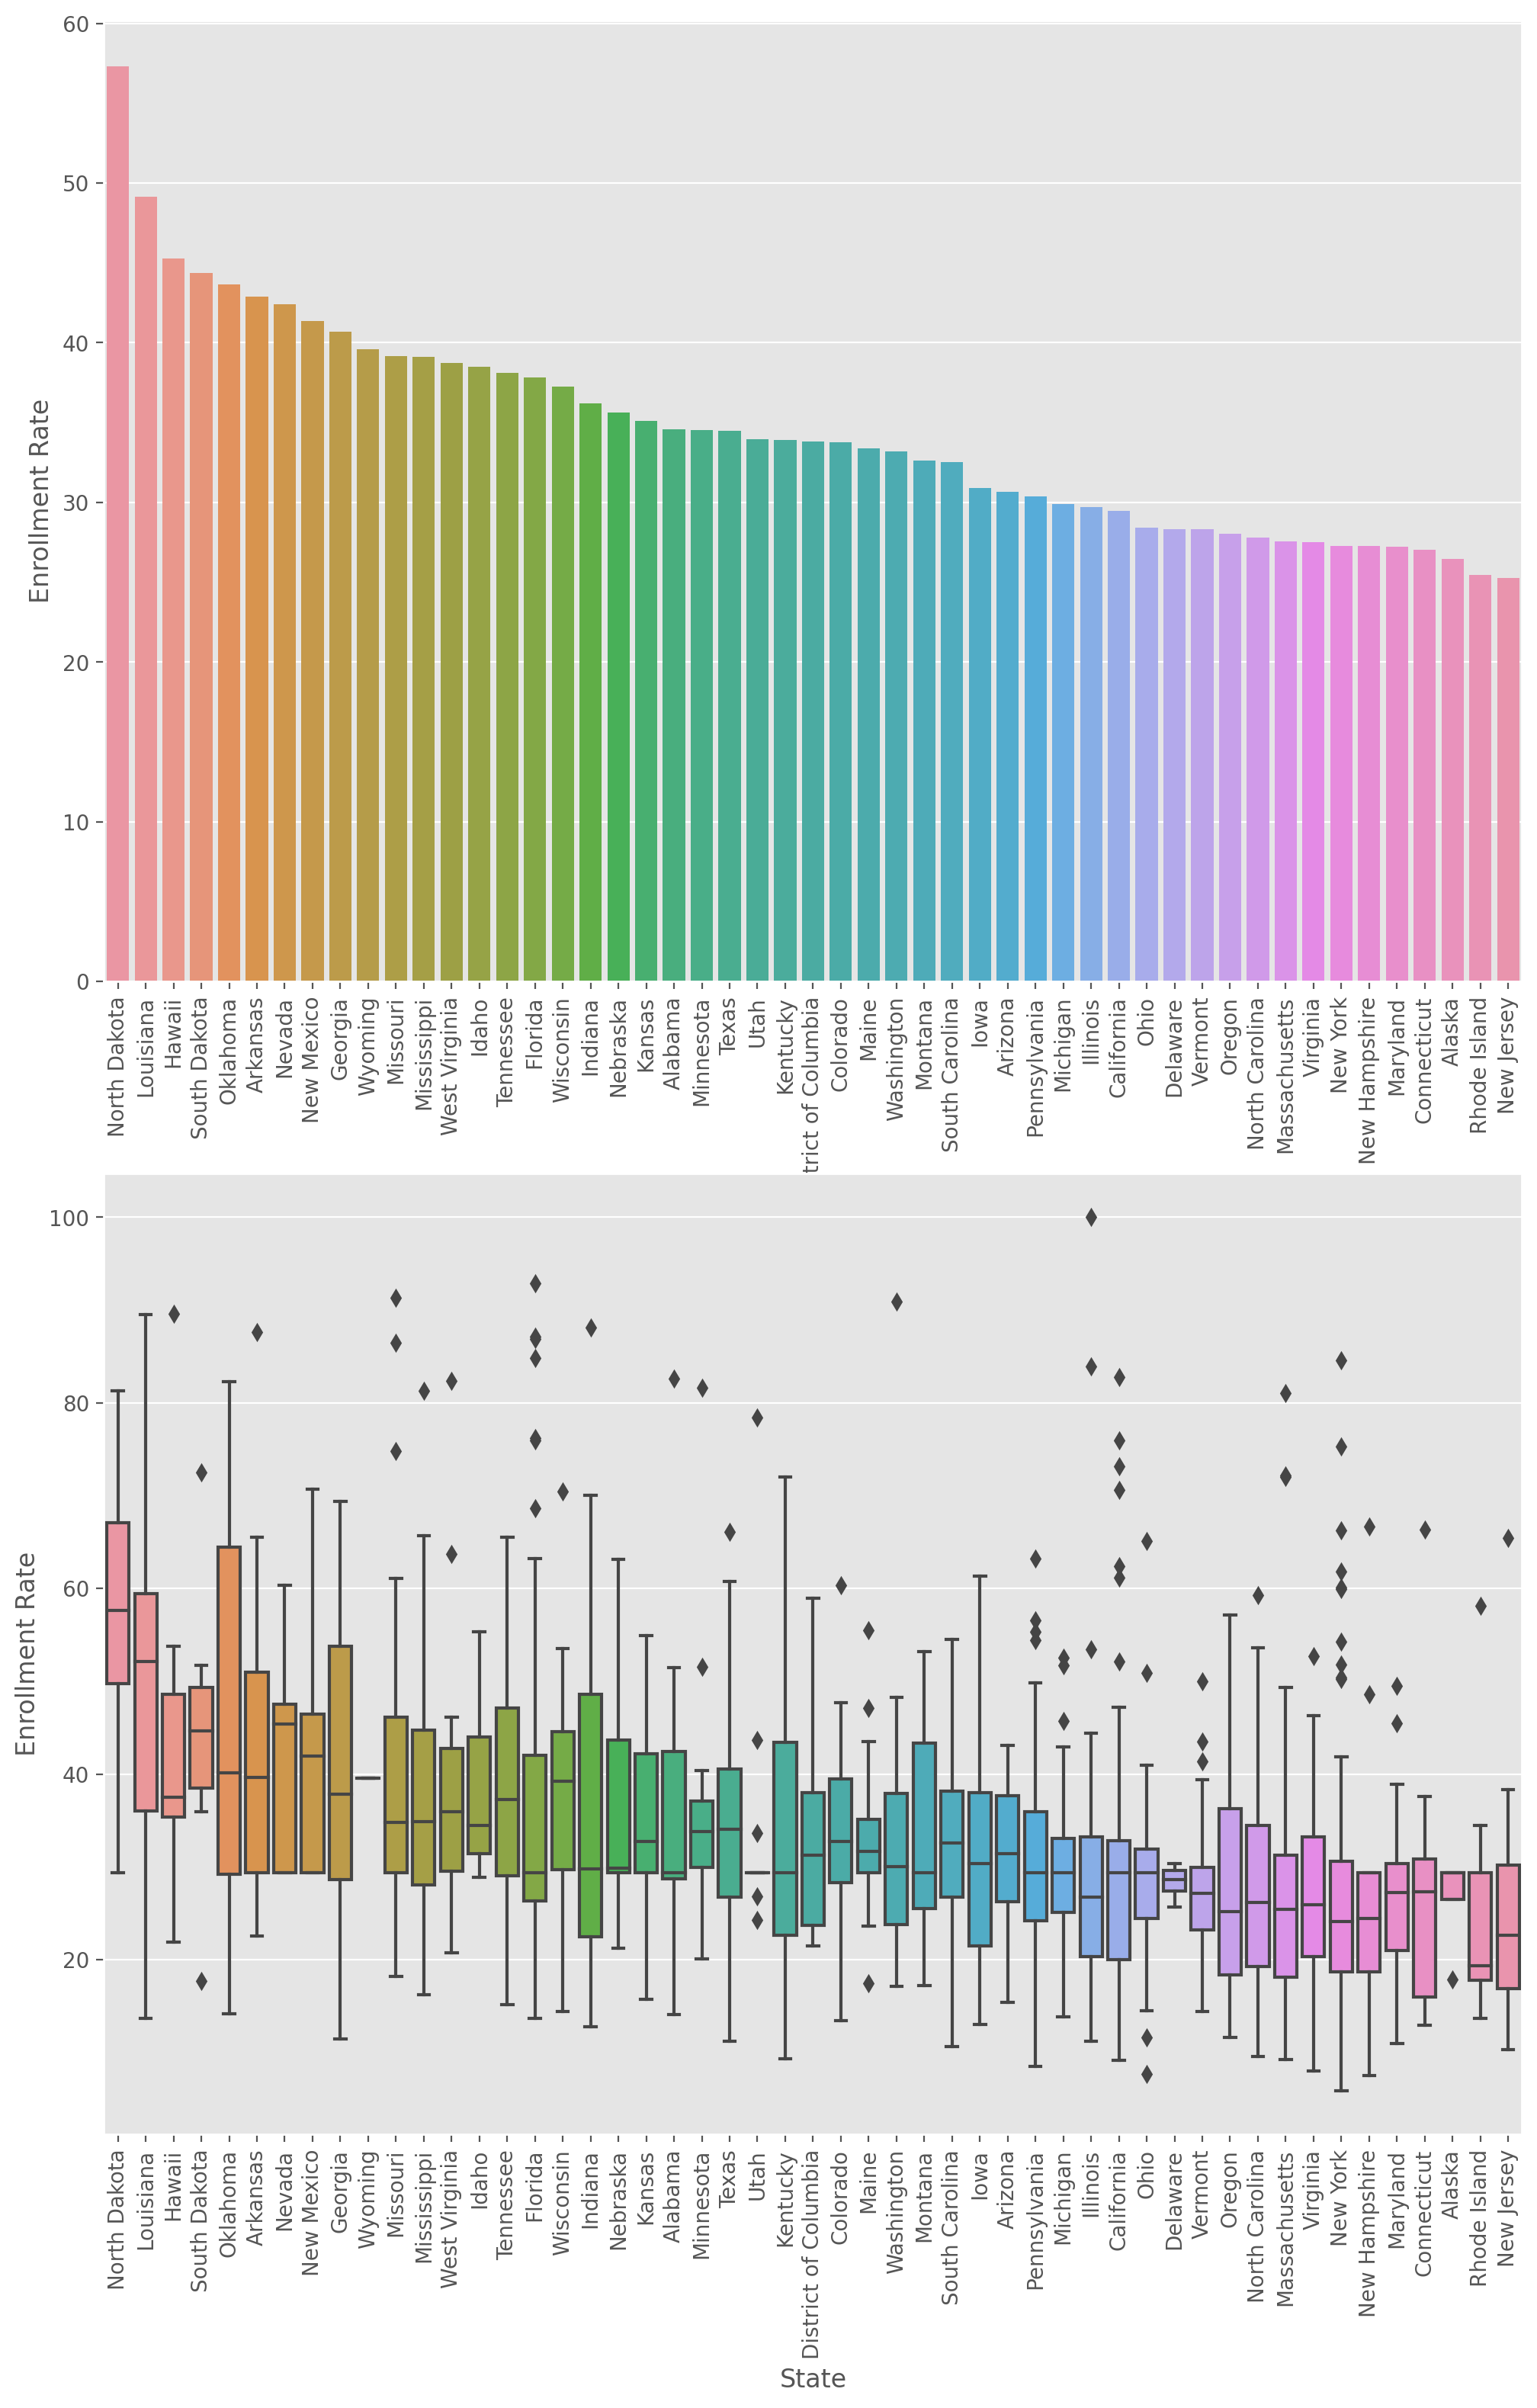

In [40]:
Q6 = Q2[['State abbreviation','Enorllment_rate']]

Q6['En_ratem'] = Q6.groupby('State abbreviation')['Enorllment_rate'].transform('mean')
Q6 = Q6.sort_values(by='En_ratem', ascending=False)

plt.figure(figsize=(12,18), dpi=200)
plt.subplot(2,1,1)
sns.barplot(x='State abbreviation',y='En_ratem', data=Q6)
plt.xticks(rotation=90)
plt.ylabel('Enrollment Rate')


plt.subplot(2,1,2)
sns.boxplot(x='State abbreviation',y='Enorllment_rate', data=Q6)
plt.xticks(rotation=90)
plt.ylabel('Enrollment Rate')
plt.xlabel('State')



plt.show()

### Q6 Inferences and Conclusions.

 - Above Chart shows that students prefer universities from highly populated states.
 - It can be found that Highest enollment is North Dakota which is ne of the most populated state and least enrollment cab be found in Alaska which is least populated state.

### 7.	Do students prefer a university because it belongs to a state with a high GDP per capita?

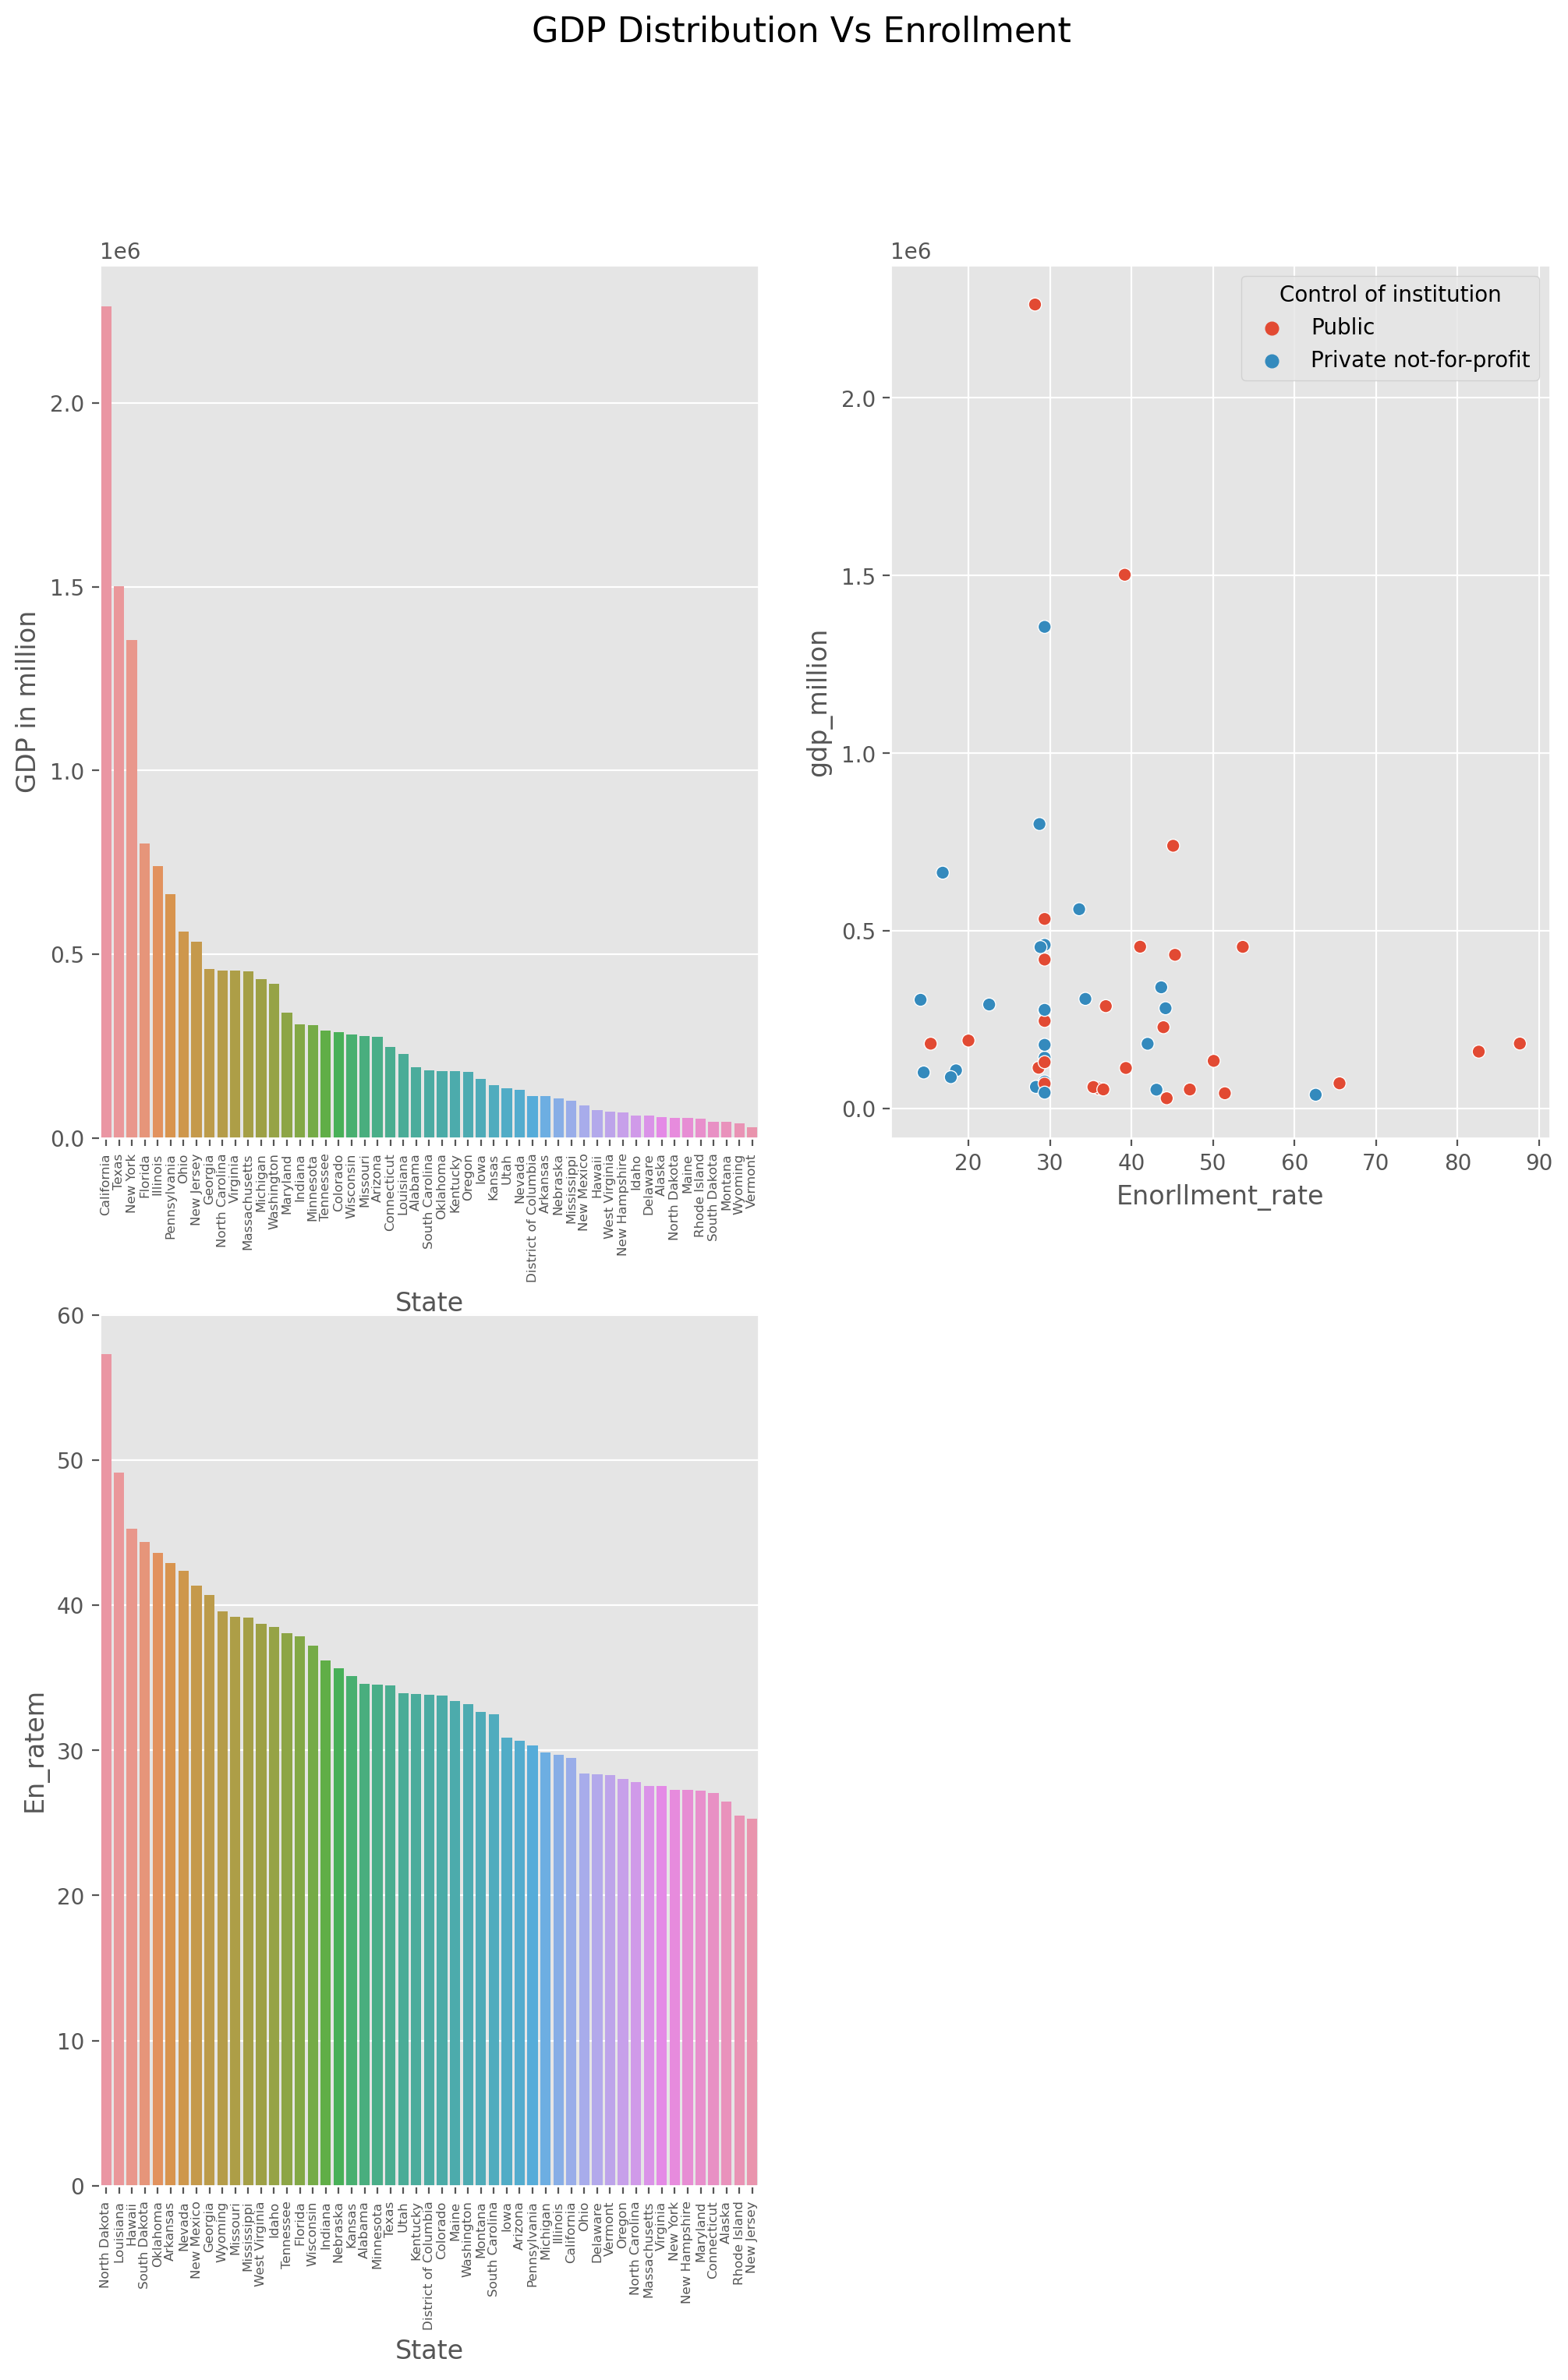

In [41]:
df_st = df_st.sort_values(by='gdp_million', ascending=False)

plt.figure(figsize=(12,16), dpi=200)
plt.suptitle("GDP Distribution Vs Enrollment", fontsize=16)

plt.subplot(2,2,1)
sns.barplot(x=df_st['state'], y=df_st['gdp_million'])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("GDP in million")
plt.xticks(rotation=90,fontsize=6)


plt.subplot(2,2,2)
sns.scatterplot(y=df_st['gdp_million'],x=Q6['Enorllment_rate'],hue='Control of institution', data=Q2)


plt.subplot(2,2,3)
sns.barplot(x=Q6['State abbreviation'],y=Q6['En_ratem'])
plt.xlabel("State")
plt.xticks(rotation=90,fontsize=6)

plt.show()

### Q7 Inferences and Conclusions.

 - Here GDP Per capita data is not given and only given gdp by state
 - By this, it assume that, Students do not prefer a university that belongs to a state with a high GDP per capita
 - State like California and Texas which is top in GDP have less than 35% of enrolment rate.
 - State like North Dakota and Lousiana which have low GDP are top in Enrollment rate.
 - This Observation shows that GDP per capita and Enrollment are inversely proportional.

### 8.	Do students prefer a university based on the possibility of a higher, additional academic degree in the same university?

In [42]:
df_ust.columns[9:20]

Index(['Offers Less than one year certificate',
       'Offers One but less than two years certificate',
       'Offers Associate's degree',
       'Offers Two but less than 4 years certificate',
       'Offers Bachelor's degree', 'Offers Postbaccalaureate certificate',
       'Offers Master's degree', 'Offers Post-master's certificate',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice',
       'Offers Doctor's degree - other'],
      dtype='object')

In [43]:
s = df_ust[['Name','Offers Less than one year certificate',
       'Offers One but less than two years certificate',
       "Offers Associate's degree",
       'Offers Two but less than 4 years certificate',
       "Offers Bachelor's degree", 'Offers Postbaccalaureate certificate',
       "Offers Master's degree", "Offers Post-master's certificate",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice",
       "Offers Doctor's degree - other"]]
Q8_merge = pd.merge(Q2,s, on='Name')
Q8_merge.head()

Name  Applicants total  Admissions total  \
0             Alabama A & M University       6142.000000       5521.000000   
1  University of Alabama at Birmingham       5689.000000       4934.000000   
2                   Amridge University       6391.193174       3554.880174   
3  University of Alabama in Huntsville       2054.000000       1656.000000   
4             Alabama State University      10245.000000       5251.000000   

   Enrolled total  Control of institution  Tuition and fees, 2013-14  \
0     1104.000000                  Public                     7182.0   
1     1773.000000                  Public                     7206.0   
2     1043.046478  Private not-for-profit                     6870.0   
3      651.000000                  Public                     9192.0   
4     1479.000000                  Public                     8720.0   

  State abbreviation  \
0            Alabama   
1            Alabama   
2            Alabama   
3            Alabama   
4            Alabama   

   Total price for in-state students living on campus 2013-14  \
0                                       21849.000000            
1                                       22495.000000            
2                                       34935.306429            
3                                       23466.000000            
4                                       18286.000000            

   Total price for out-of-state students living on campus 2013-14  \
0                                       27441.000000                
1                                       31687.000000                
2                                       38767.612857                
3                                       35780.000000                
4                                       25222.000000                

   Admission_rate  ...  Offers One but less than two years certificate  \
0       89.889287  ...                                      Implied no   
1       86.728775  ...                                             Yes   
2       55.621542  ...                                      Implied no   
3       80.623174  ...                                      Implied no   
4       51.254270  ...                                      Implied no   

  Offers Associate's degree Offers Two but less than 4 years certificate  \
0                Implied no                                   Implied no   
1                Implied no                                          Yes   
2                       Yes                                   Implied no   
3                Implied no                                   Implied no   
4                Implied no                                   Implied no   

  Offers Bachelor's degree Offers Postbaccalaureate certificate  \
0                      Yes                           Implied no   
1                      Yes                                  Yes   
2                      Yes                           Implied no   
3                      Yes                                  Yes   
4                      Yes                           Implied no   

  Offers Master's degree Offers Post-master's certificate  \
0                    Yes                       Implied no   
1                    Yes                              Yes   
2                    Yes                       Implied no   
3                    Yes                              Yes   
4                    Yes                              Yes   

  Offers Doctor's degree - research/scholarship  \
0                                           Yes   
1                                           Yes   
2                                           Yes   
3                                           Yes   
4                                           Yes   

  Offers Doctor's degree - professional practice  \
0                                     Implied no   
1                                            Yes   
2                                            Y

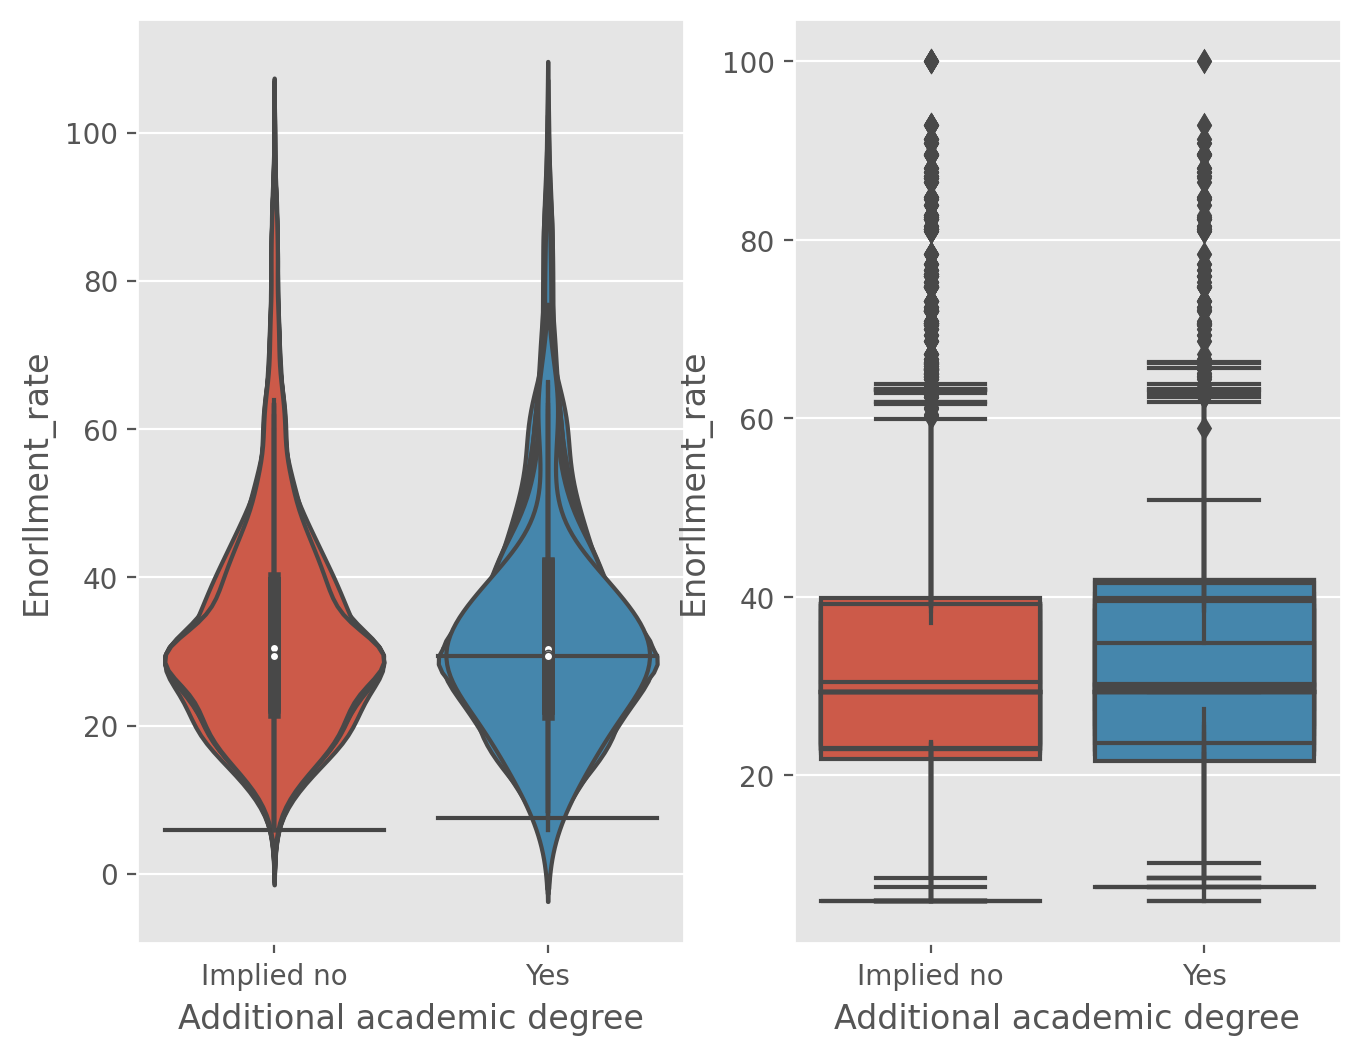

In [44]:
plt.figure(figsize=(12,6), dpi=200)

plt.subplot(1,3,1)
for degree in Q8_merge.columns[10:]:
    sns.violinplot(x=degree,y='Enorllment_rate', data=Q8_merge)

plt.xlabel('Additional academic degree')    
plt.subplot(1,3,2)
for degree in Q8_merge.columns[10:]:
    sns.boxplot(x=degree,y='Enorllment_rate', data=Q8_merge)
plt.xlabel('Additional academic degree')    
    
plt.show()




### Q7 Inferences and Conclusions.
 - Above analysis show that, if instituion provide additional degree, student are more likely to join

# 4. Inferences and Conclusions.


- **University Preference based on Applicants:**
  - Higher applicants indicate a preference for a university.
  - Public universities are favored over private ones.

- **Enrollment Rate Trends:**
  - Preference for universities with lower enrollment rates.
  - Higher application rates for lower enrollment rate universities.

- **Admission Rate and Enrollment Rate Relationship:**
  - Admission rate doesn't significantly impact enrollment rate.

- **Comparison of Top 5 and Bottom 5 Enrolled Universities:**
  - Top 5 universities: Higher enrollment rates compared to admission rates.
  - Last 5 universities: Lower enrollment rates compared to admission rates.

- **University Type Preferences:**
  - Preference for public universities over private ones.

- **Tuition Fees Analysis:**
  - Preference for lower tuition fees.
  - Public universities are generally cheaper than private ones.

- **Preferred Tuition Fee Range:**
  - Public university fees around $9000.
  - Private university fees range between $20,000 to $30,000.

- **No Clear Relationship with Living Expenses:**
  - No evident relationship between living expenses and university preferences.

- **State Population and Enrollment:**
  - Students prefer universities in highly populated states.

- **GDP per Capita and Enrollment:**
  - Inverse relationship between GDP per capita and enrollment.
  - States with low GDP per capita (e.g., North Dakota, Louisiana) have high enrollment rates.

- **Additional Degree Offerings:**
  - Institutions offering additional degrees attract more students.
